# **Credit Card Fraud Detection Dataset**

**👨‍💻Author: Muhammad Hassaan**

[![GitHub](https://img.shields.io/badge/GitHub-Profile-blue?style=for-the-badge&logo=github)](https://github.com/iammuhammadhassaaan) 
[![Kaggle](https://img.shields.io/badge/Kaggle-Profile-blue?style=for-the-badge&logo=kaggle)](https://www.kaggle.com/mhassaan1122) 
[![LinkedIn](https://img.shields.io/badge/LinkedIn-Profile-blue?style=for-the-badge&logo=linkedin)](https://www.linkedin.com/in/iammuhammadhassaan7/)  
[![Email](https://img.shields.io/badge/Email-Contact%20Me-red?style=for-the-badge&logo=email)](mailto:muhammadhassaan7896@gmail.com)

## Importing Libraries

In [110]:
# importing basic libraries 
import pandas as pd
import numpy as np

# importing visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly.express as px
import plotly.graph_objects as go

# stats libraries
from scipy import stats
from scipy.stats import skew
from scipy.stats import kurtosis

# importing machine learning libraries
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectKBest, chi2
import collections


# imbalance data handling
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.combine import SMOTEENN
from imblearn.under_sampling import NearMiss 
from imblearn.metrics import classification_report_imbalanced
from collections import Counter

# tensorflow libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# import time
import time

# import warnings 
import warnings
warnings.filterwarnings("ignore")

## Load the Dataset

In [111]:
df = pd.read_csv("../data/creditcard.csv")

## Exploratory Data Analysis

### 1. Basic EDA

In [112]:
# check head of the data
df.head()

Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28  Amount  Class  
0 -0.189115  0.133558 -0.021053  149.62      0  
1  0.125895 -0.008983  0.014724    2.69      0  
2 -0.139097 -0.055353 -0.059752  378.66      0  
3 -0.221929  0.062723  0.061458  123.50      0  
4  0.502292  0.219422  0.215153   69.99      0  

[5 rows x 31 columns]

In [113]:
# check tail of the data
df.tail()

Time         V1         V2        V3        V4        V5  \
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...       V21       V22  \
284802 -2.606837 -4.918215  7.305334  1.914428  ...  0.213454  0.111864   
284803  1.058415  0.024330  0.294869  0.584800  ...  0.214205  0.924384   
284804  3.031260 -0.296827  0.708417  0.432454  ...  0.232045  0.578229   
284805  0.623708 -0.686180  0.679145  0.392087  ...  0.265245  0.800049   
284806 -0.649617  1.577006 -0.414650  0.486180  ...  0.261057  0.643078   

             V23       V24       V25       V26       V27       V28  Amount  \
284802  1.014480 -0.509348  1.436807  0.250034  0.943651  0.823731    0.77   
284803  0.012463 -1.016226 -0.606624 -0.395255  0.068472 -0.053527   24.79   
284804 -0.037501  0.640134  0.265745 -0.087371  0.004455 -0.026561   67.88   
284805 -0.163298  0.123205 -0.569159  0.546668  0.108821  0.104533   10.00   
284806  0.376777  0.008797 -0.473649 -0.818267 -0.002415  0.013649  217.00   

        Class  
284802      0  
284803      0  
284804      0  
284805      0  
284806      0  

[5 rows x 31 columns]

In [114]:
# check shape of the data
print("Data Shape:")
df.shape

Data Shape:


(284807, 31)

In [115]:
# check info of the datse
print("Data Info:")
df.info()

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21 

In [116]:
# check summary statistics of the data
print("Summary Statistics of the Data:")
df.describe()

Summary Statistics of the Data:


Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   9.604066e-16  1.487313e-15 -5.556467e-16  1.213481e-16 -2.406331e-15   
std    1.380247e+00  1.332271e+00  1.237094e+00  1.194353e+00  1.098632e+00   
min   -1.137433e+02 -2.616051e+01 -4.355724e+01 -7.321672e+01 -1.343407e+01   
25%   -6.915971e-01 -7.682956e-01 -5.540759e-01 -2.086297e-01 -6.430976e-01   
50%   -5.433583e-02 -2.741871e-01  4.010308e-02  2.235804e-02 -5.142873e-02   
75%    6.119264e-01  3.985649e-01  5.704361e-01  3.273459e-01  5.971390e-01   
max    3.480167e+01  7.330163e+01  1.205895e+02  2.000721e+01  1.559499e+01   

       ...           V21           V22           V23           V24  \
count  ...  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   ...  1.654067e-16 -3.568593e-16  2.578648e-16  4.473266e-15   
std    ...  7.345240e-01  7.257016e-01  6.244603e-01  6.056471e-01   
min    ... -3.483038e+01 -1.093314e+01 -4.480774e+01 -2.836627e+00   
25%    ... -2.283949e-01 -5.423504e-01 -1.618463e-01 -3.545861e-01   
50%    ... -2.945017e-02  6.781943e-03 -1.119293e-02  4.097606e-02   
75%    ...  1.863772e-01  5.285536e-01  1.476421e-01  4.395266e-01   
max    ...  2.720284e+01  1.050309e+01  2.252841e+01  4.584549e+00   

                V25           V26           V27           V28         Amount  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  284807.000000   
mean   5.340915e-16  1.683437e-15 -3.660091e-16 -1.227390e-16      88.349619   
std    5.212781e-01  4.822270e-01  4.036325e-01  3.300833e-01     250.120109   
min   -1.029540e+01 -2.604551e+00 -2.256568e+01 -1.543008e+01       0.000000   
25%   -3.171451e-01 -3.269839e-01 -7.083953e-02 -5.295979e-02       5.600000   
50%    1.659350e-02 -5.213911e-02  1.342146e-03  1.124383e-02      22.000000   
75%    3.507156e-01  2.409522e-01  9.104512e-02  7.827995e-02      77.165000   
max    7.519589e+00  3.517346e+00  3.161220e+01  3.384781e+01   25691.160000   

               Class  
count  284807.000000  
mean        0.001727  
std         0.041527  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         0.000000  
max         1.000000  

[8 rows x 31 columns]

In [117]:
# check columns of the data
print(df.columns)

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


> **Insights:**
> - Shape of Data: The dataset has 284,807 rows and 31 columns, which suggests a substantial sample size for analysis.
> - Null Values: No missing values, as all columns have 284,807 non-null entries.
> - Feature Types: Primarily float features, with Class as an integer (target variable).
> - Initial Summary: Statistics indicate possible outliers (e.g., in Amount feature due to high standard deviation).

### 2. Check Class Distribution

In [118]:
# check the distribution of the target variable "Class"
class_counts = df["Class"].value_counts()
print("Class Distribution:")
print(class_counts)

Class Distribution:
Class
0    284315
1       492
Name: count, dtype: int64


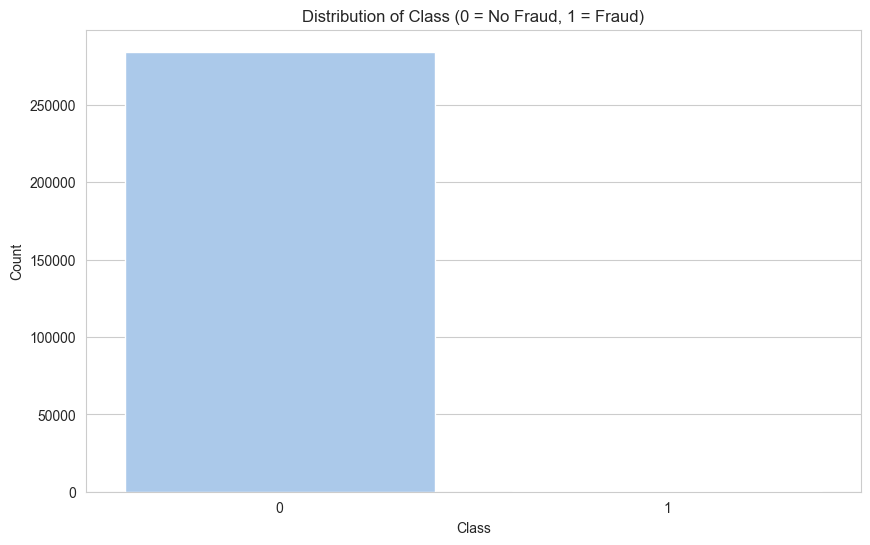

In [119]:
# visualize class distribution 
plt.figure(figsize=(10, 6))
sns.countplot(x='Class', data=df, palette='pastel')
plt.title('Distribution of Class (0 = No Fraud, 1 = Fraud)')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

> **Insights:**
> - **Class Imbalance**: The distribution shows that class `0` (Non-Fraud) is highly overrepresented compared to class `1` (Fraud), indicating severe imbalance.
> - **Imbalance Ratio**: Understanding this imbalance is critical, as it may bias the model toward predicting non-fraud more often.
> - **Implication for Modeling**: This imbalance will require handling methods like SMOTE (Synthetic Minority Over-sampling Technique) or using specialized metrics such as Precision, Recall, and F1-score for evaluation, rather than accuracy alone.

### 3. Time Feature Analysis

#### Histogram

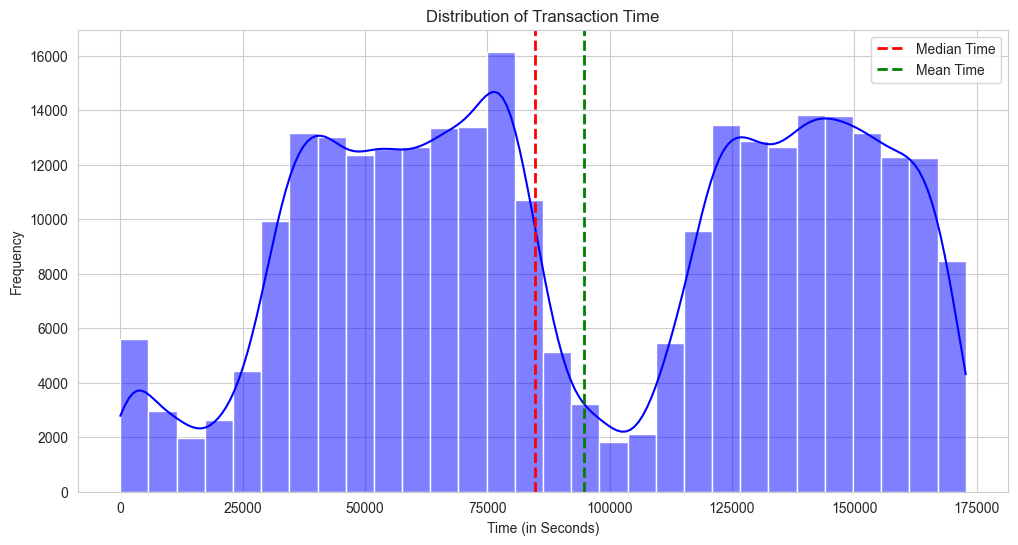

In [120]:
# set the style 
sns.set_style('whitegrid')

# create a histogram
plt.figure(figsize=(12, 6))
sns.histplot(df['Time'], bins=30, kde=True, color='blue')
plt.title('Distribution of Transaction Time')
plt.xlabel("Time (in Seconds)")
plt.ylabel("Frequency")
plt.axvline(x = df['Time'].median(), color='red', linestyle='dashed', linewidth=2, label='Median Time')
plt.axvline(x = df['Time'].mean(), color='green', linestyle='dashed', linewidth=2, label='Mean Time')
plt.legend()
plt.show()

#### LinePlot

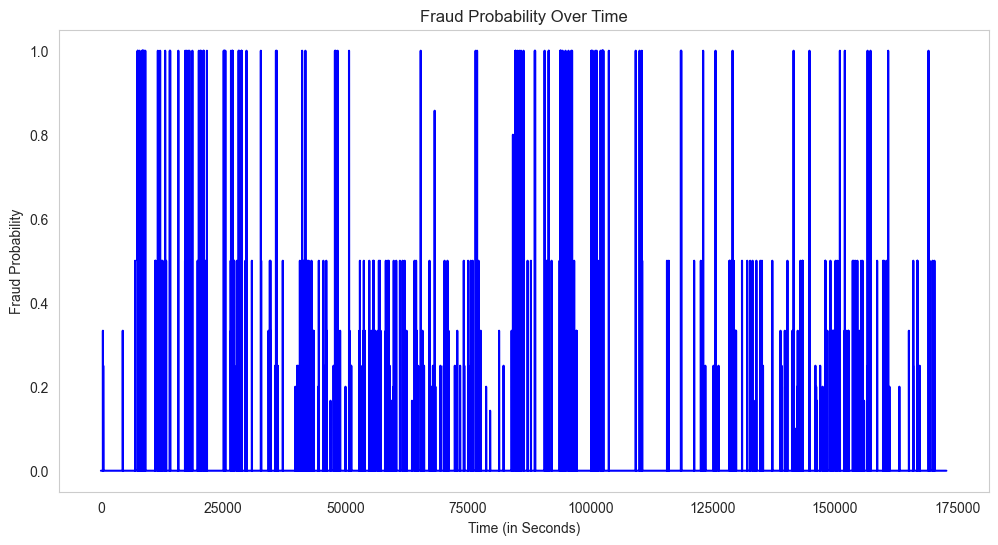

In [121]:
# create a line plot to analyze fraud over time 
plt.figure(figsize=(12, 6))
time_fruad = df.groupby('Time')['Class'].mean().reset_index()
plt.plot(time_fruad['Time'], time_fruad['Class'], color='blue')
plt.title('Fraud Probability Over Time')
plt.xlabel("Time (in Seconds)")
plt.ylabel("Fraud Probability")
plt.grid()
plt.show()

**`Insights:`**
- Time Distribution: The histogram allows us to see how transactions are distributed over time, which can help identify periods of high activity or inactivity.
- Trends in Fraud: The line plot illustrates whether certain times correlate with higher fraud probabilities, indicating when the risk of fraud might be elevated.

>

#### Q1: Check if certain times of day correlate with a higher likelihood of fraud?

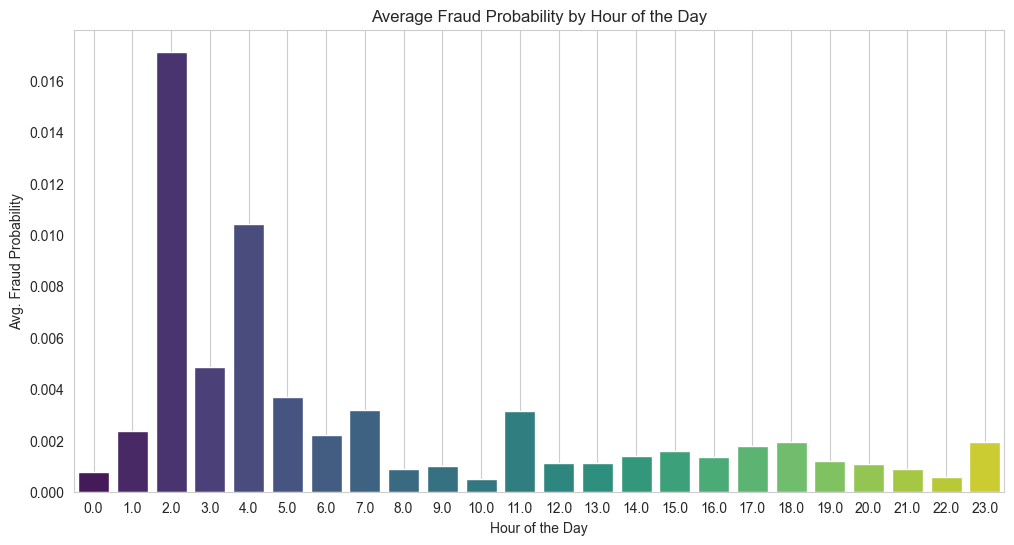

In [122]:
# convert 'Time' from seconds to hours for better analysis 
df['Hour'] = (df['Time'] //  3600) % 24

# caluclate the mean fruad probability by hour 
hour_fraud = df.groupby('Hour')['Class'].mean().reset_index()

# plotting the average fruad probability by hour 
plt.figure(figsize=(12, 6))
sns.barplot(data=hour_fraud, x='Hour', y='Class', palette='viridis')
plt.title('Average Fraud Probability by Hour of the Day')
plt.xlabel("Hour of the Day")
plt.ylabel("Avg. Fraud Probability")
plt.xticks(range(0, 24))
plt.grid()
plt.show()

#### Q2: Analyze unsual spikes in Fruad

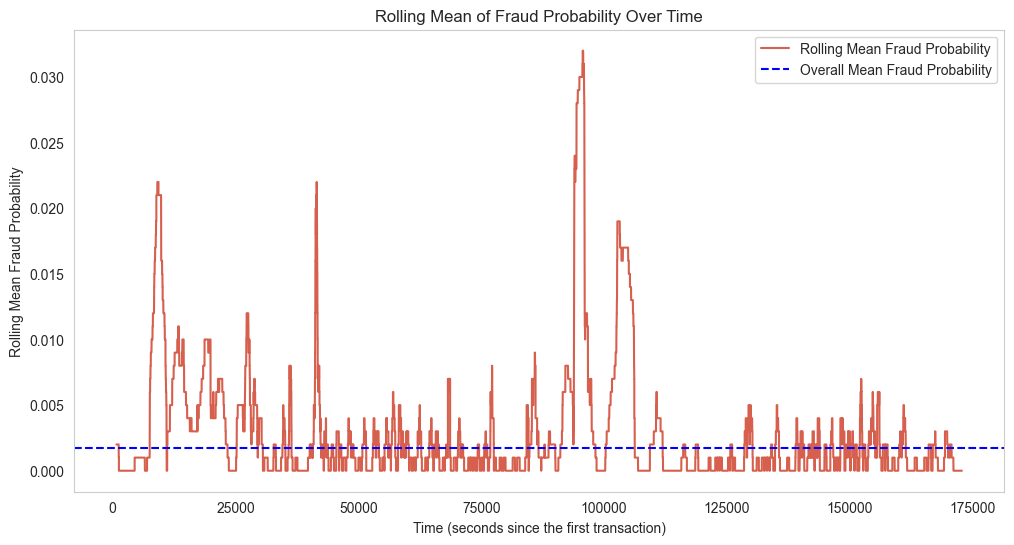

In [123]:
# create a rolling mean to identify spikes in fraud
# Create a rolling mean to identify spikes
df['Fraud_Spike'] = df['Class'].rolling(window=1000).mean()  # Window size can be adjusted

# Plotting the rolling mean of fraud over time
plt.figure(figsize=(12, 6))
plt.plot(df['Time'], df['Fraud_Spike'], color='#d6604d', label='Rolling Mean Fraud Probability')
plt.title('Rolling Mean of Fraud Probability Over Time')
plt.xlabel('Time (seconds since the first transaction)')
plt.ylabel('Rolling Mean Fraud Probability')
plt.axhline(y=df['Class'].mean(), color='blue', linestyle='--', label='Overall Mean Fraud Probability')
plt.legend()
plt.grid()
plt.show()

**`Insights:`**
- Time of Day Correlation: The bar plot shows which hours are more likely to have fraudulent activity, helping to identify peak risk times.
- Unusual Spikes: The rolling mean plot can indicate periods with significant increases in fraud activity, prompting further investigation.

### 4. Amount Distribution

#### 1. Boxplot

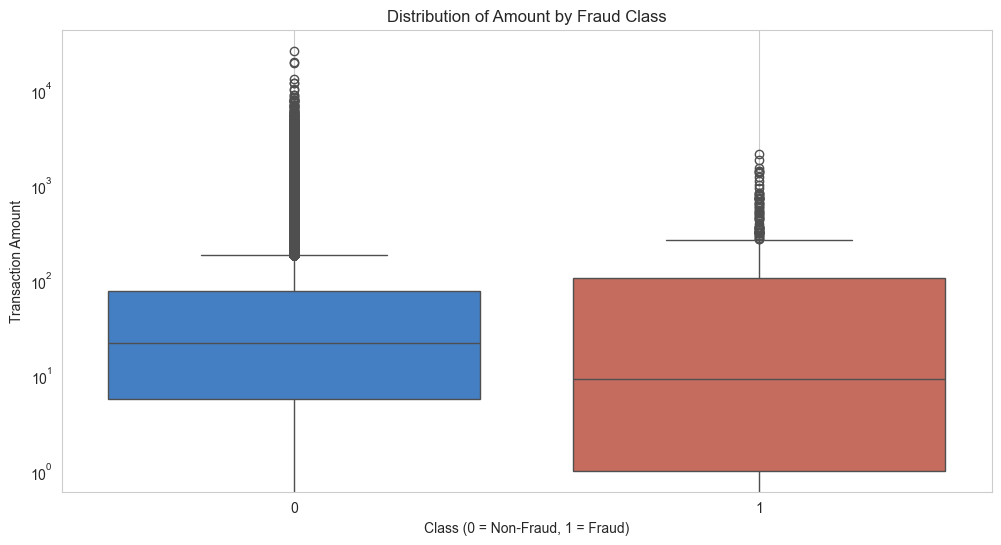

In [124]:
# create a boxplot to visualize the amount of distribution based on fraud classification
plt.figure(figsize=(12, 6))
sns.boxplot(x='Class', y='Amount', data=df, palette=['#2f7ed8', '#d6604d'])
plt.title('Distribution of Amount by Fraud Class')
plt.xlabel('Class (0 = Non-Fraud, 1 = Fraud)')
plt.ylabel('Transaction Amount')
plt.yscale('log')  # Use log scale for better visualization of outliers
plt.grid()
plt.show()

#### 2. Histogram 

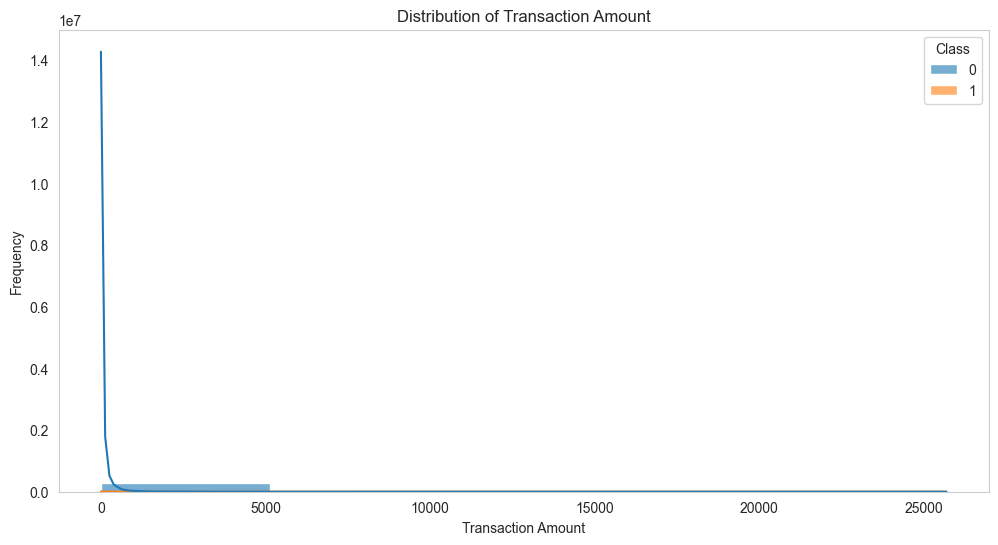

In [125]:
# create a histogram to visualize the distribution of amount
plt.figure(figsize=(12, 6))
sns.histplot(x ='Amount', hue='Class', data=df, bins=5, kde=True, color=['#2f7ed8', '#d6604d'], alpha=0.6)
plt.title('Distribution of Transaction Amount')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.grid()
plt.show()

**Insights:**
- Comparison of Transaction Amounts: The boxplot allows us to visually compare the median and interquartile range of transaction amounts for fraudulent and non-fraudulent transactions.
- Transaction Amount Frequency: The histogram provides insights into how frequently different transaction amounts occur, indicating whether certain amounts are more commonly associated with fraud.

#### 3. Questions

In [126]:
# calculate the mean and median transaction amount for fraud and non-fraud transactions
mean_amounts = df.groupby('Class')['Amount'].agg(['mean', 'median']).reset_index()
print("Mean and Median Transactions Amounts:")
print(mean_amounts)

Mean and Median Transactions Amounts:
   Class        mean  median
0      0   88.291022   22.00
1      1  122.211321    9.25


In [127]:
# calculate the percentage of fraudulent transactions in different ranges 
bins = [0, 50, 100, 200, 500, 1000, 5000, 10000, 50000] 
labels = ['0-50', '51-100', '101-200', '201-500', '501-1000', '1001-5000', '5001-10000', '10001+']
df['Amount Range'] = pd.cut(df['Amount'], bins=bins, labels=labels, right=False)

# calculate the counts of fraud in each amount range 
fraud_counts = df.groupby('Amount Range')['Class'].value_counts(normalize=True).unstack().fillna(0)
fraud_counts.columns = ['Non-Fraud', 'Fraud']
fraud_counts =  fraud_counts * 100

# display the percentage of in each amount range
print("Percentage of Fraudulent Transactions in Each Amount Range:")
print(fraud_counts)

Percentage of Fraudulent Transactions in Each Amount Range:
               Non-Fraud     Fraud
Amount Range                      
0-50           99.839223  0.160777
51-100         99.848879  0.151121
101-200        99.839686  0.160314
201-500        99.747768  0.252232
501-1000       99.595205  0.404795
1001-5000      99.701393  0.298607
5001-10000    100.000000  0.000000
10001+        100.000000  0.000000


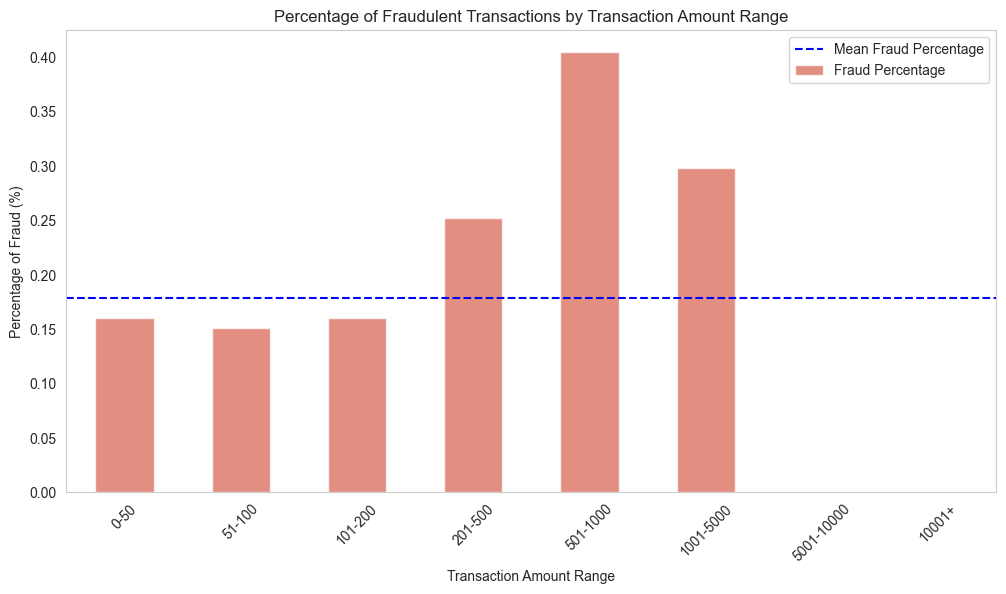

In [128]:
# plotting the percentage of fraudulent transactions in each amount range
plt.figure(figsize=(12, 6))
fraud_counts['Fraud'].plot(kind='bar', color='#d6604d', alpha=0.7, label='Fraud Percentage')
plt.title('Percentage of Fraudulent Transactions by Transaction Amount Range')
plt.xlabel('Transaction Amount Range')
plt.ylabel('Percentage of Fraud (%)')
plt.xticks(rotation=45)
plt.grid()
plt.axhline(y=fraud_counts['Fraud'].mean(), color='blue', linestyle='--', label='Mean Fraud Percentage')
plt.legend()
plt.show()

**Insights:**
- The mean and median transaction amounts provide an immediate indication of whether fraudulent transactions tend to be higher or lower than non-fraudulent ones.
- The bar plot will show the distribution of fraud percentages across different transaction amounts, helping identify specific ranges that are more prone to fraud.

### 5. Correlation Analysis

In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 34 columns):
 #   Column        Non-Null Count   Dtype   
---  ------        --------------   -----   
 0   Time          284807 non-null  float64 
 1   V1            284807 non-null  float64 
 2   V2            284807 non-null  float64 
 3   V3            284807 non-null  float64 
 4   V4            284807 non-null  float64 
 5   V5            284807 non-null  float64 
 6   V6            284807 non-null  float64 
 7   V7            284807 non-null  float64 
 8   V8            284807 non-null  float64 
 9   V9            284807 non-null  float64 
 10  V10           284807 non-null  float64 
 11  V11           284807 non-null  float64 
 12  V12           284807 non-null  float64 
 13  V13           284807 non-null  float64 
 14  V14           284807 non-null  float64 
 15  V15           284807 non-null  float64 
 16  V16           284807 non-null  float64 
 17  V17           284807 non-null

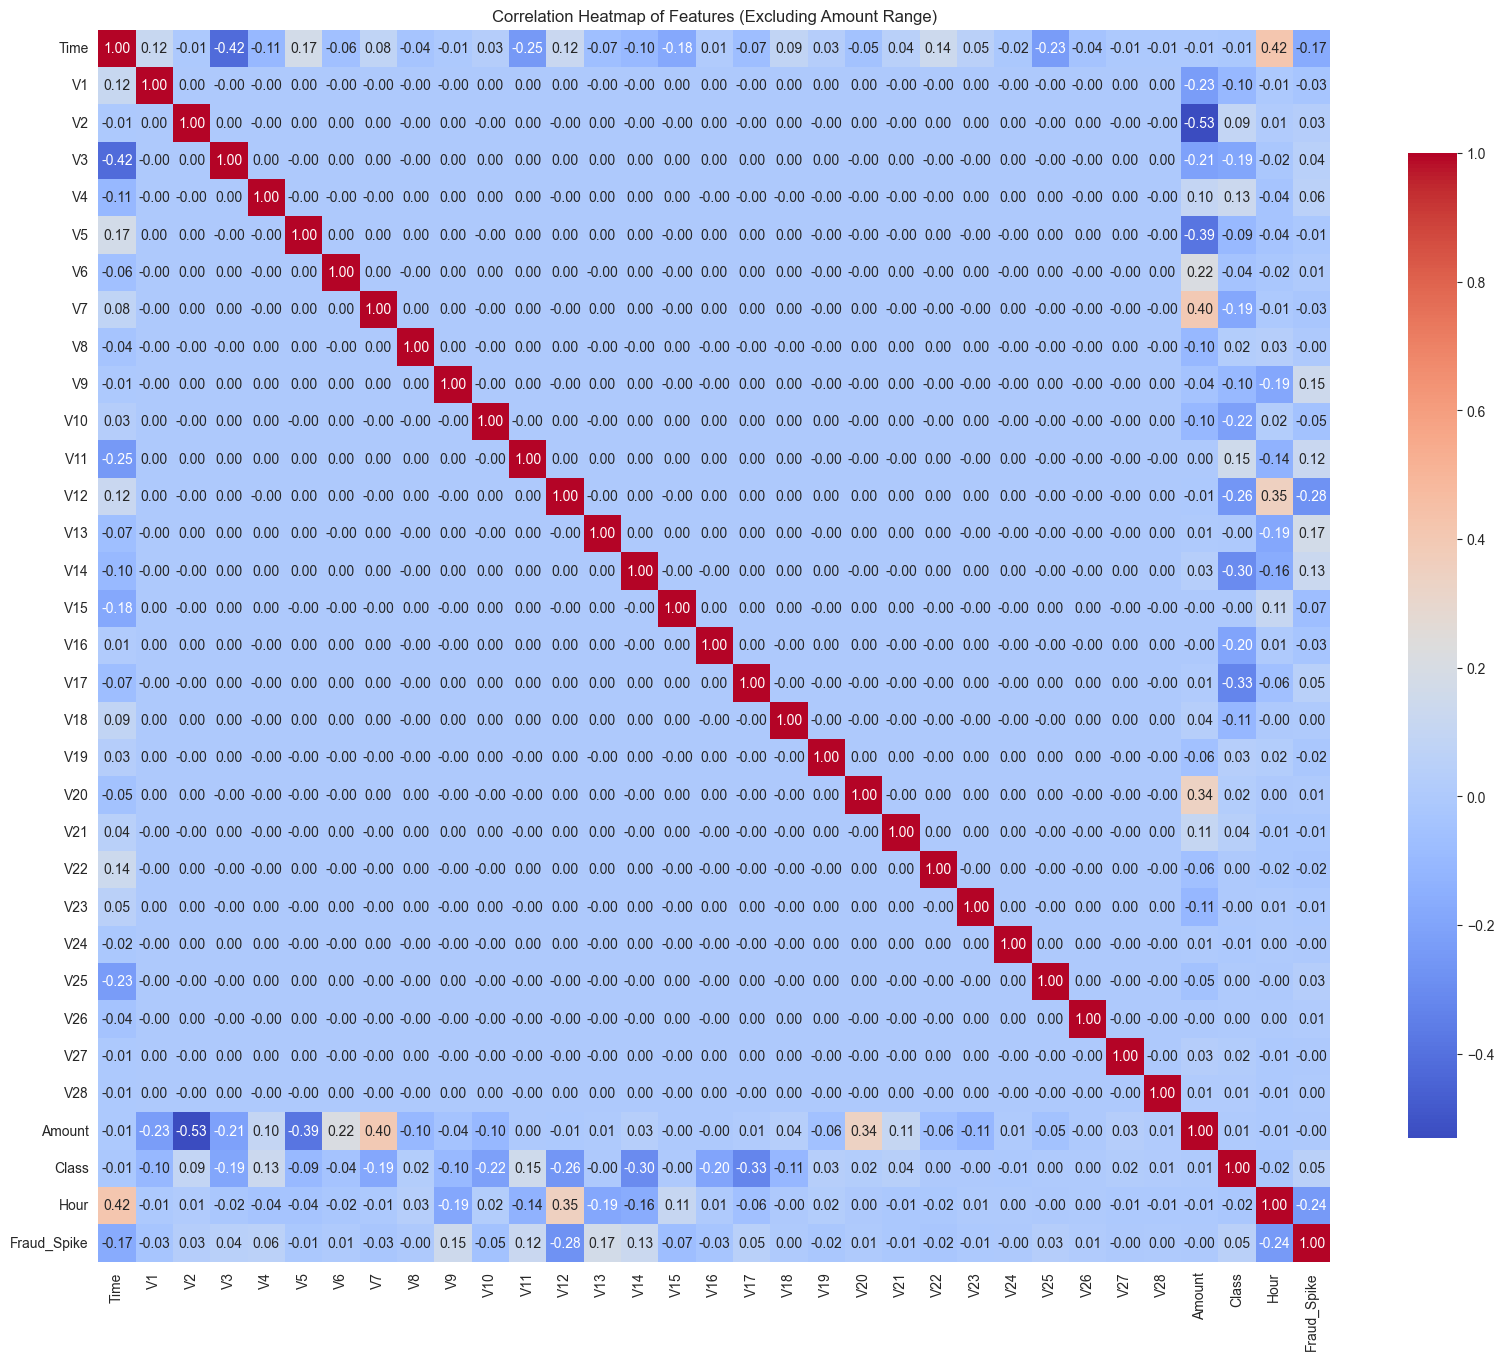

In [130]:
# calculate the correlation matrix
corr_matrix = df.drop(columns=['Amount Range']).corr()

# plot the correlation matrix
plt.figure(figsize=(20, 16))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Heatmap of Features (Excluding Amount Range)')
plt.show()

In [131]:
# Identifying strong correlations
strong_correlation_excluding_category = corr_matrix[abs(corr_matrix) > 0.5]  # Adjust the threshold as needed
print("Features with strong correlations (|correlation| > 0.5) excluding Amount Range:")
print(strong_correlation_excluding_category)

Features with strong correlations (|correlation| > 0.5) excluding Amount Range:
             Time   V1        V2   V3   V4   V5   V6   V7   V8   V9  ...  V23  \
Time          1.0  NaN       NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN   
V1            NaN  1.0       NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN   
V2            NaN  NaN  1.000000  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN   
V3            NaN  NaN       NaN  1.0  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN   
V4            NaN  NaN       NaN  NaN  1.0  NaN  NaN  NaN  NaN  NaN  ...  NaN   
V5            NaN  NaN       NaN  NaN  NaN  1.0  NaN  NaN  NaN  NaN  ...  NaN   
V6            NaN  NaN       NaN  NaN  NaN  NaN  1.0  NaN  NaN  NaN  ...  NaN   
V7            NaN  NaN       NaN  NaN  NaN  NaN  NaN  1.0  NaN  NaN  ...  NaN   
V8            NaN  NaN       NaN  NaN  NaN  NaN  NaN  NaN  1.0  NaN  ...  NaN   
V9            NaN  NaN       NaN  NaN  NaN  NaN  NaN  NaN  NaN  1.0  ...  NaN   
V10           NaN  NaN       

**Insights:**
- By excluding the Amount_Range, you can gain insights specifically into how the other numerical features correlate with each other and with the target variable (Class).

### 6. PCA 

In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 34 columns):
 #   Column        Non-Null Count   Dtype   
---  ------        --------------   -----   
 0   Time          284807 non-null  float64 
 1   V1            284807 non-null  float64 
 2   V2            284807 non-null  float64 
 3   V3            284807 non-null  float64 
 4   V4            284807 non-null  float64 
 5   V5            284807 non-null  float64 
 6   V6            284807 non-null  float64 
 7   V7            284807 non-null  float64 
 8   V8            284807 non-null  float64 
 9   V9            284807 non-null  float64 
 10  V10           284807 non-null  float64 
 11  V11           284807 non-null  float64 
 12  V12           284807 non-null  float64 
 13  V13           284807 non-null  float64 
 14  V14           284807 non-null  float64 
 15  V15           284807 non-null  float64 
 16  V16           284807 non-null  float64 
 17  V17           284807 non-null

<Figure size 1600x2400 with 0 Axes>

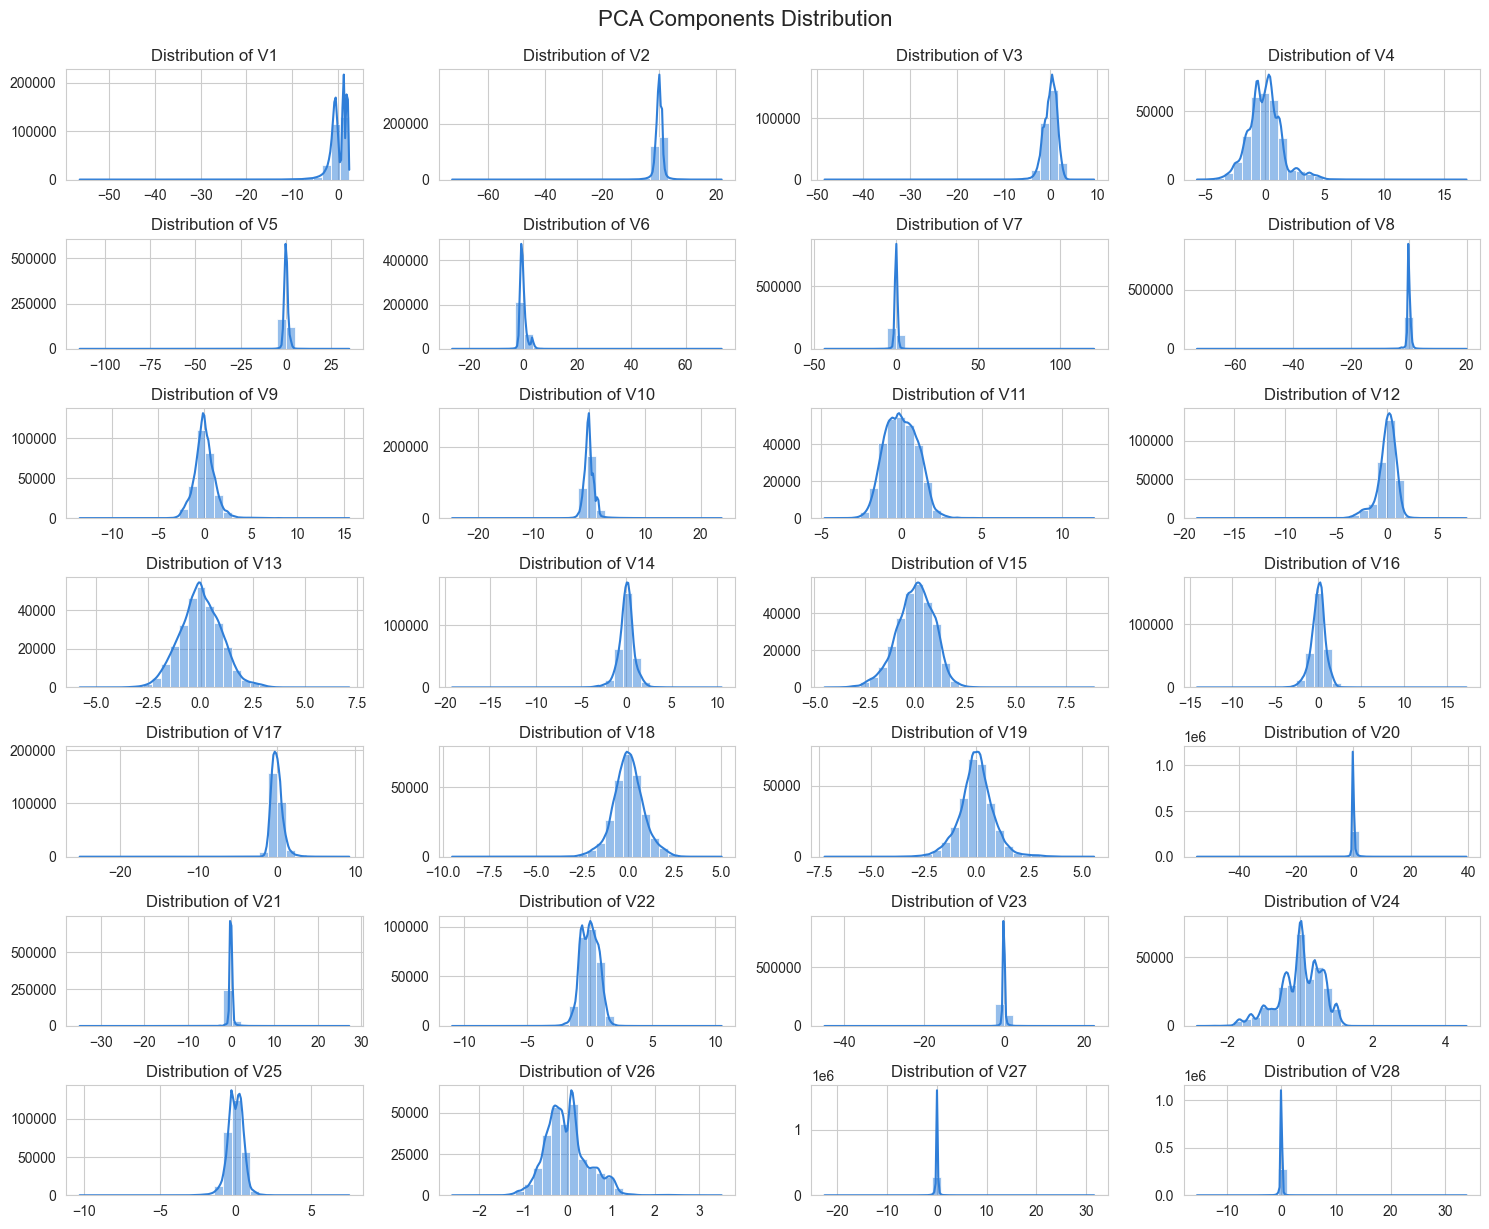

In [133]:
# PCA Component Analysis
# setup matplotlib figure
plt.figure(figsize=(16, 24))

# List of PCA components (V1 to V28)
pca_components = [f'V{i}' for i in range(1, 29)]

# Plotting distributions of PCA components
plt.figure(figsize=(15, 12))
for i, component in enumerate(pca_components, 1):
    plt.subplot(7, 4, i)  # 7 rows and 4 columns for 28 PCA components
    sns.histplot(df[component], kde=True, bins=30, color='#2f7ed8')
    plt.title(f'Distribution of {component}')
    plt.xlabel('')
    plt.ylabel('')

plt.tight_layout()
plt.suptitle('PCA Components Distribution', y=1.02, fontsize=16)
plt.show()

> **📝 PCA Component Analysis Insights**:
> - **Component Distributions**: Each PCA component (`V1` to `V28`) shows distinct distribution patterns, potentially indicating how they encode different transactional aspects.
> - **Identifying Fraud-Prone Components**: Some components may have notable differences in distribution for fraud vs. non-fraud transactions.
> - **Feature Importance**: These components can provide hints on feature importance when examining their association with fraud.


### 7. Outlier Detection

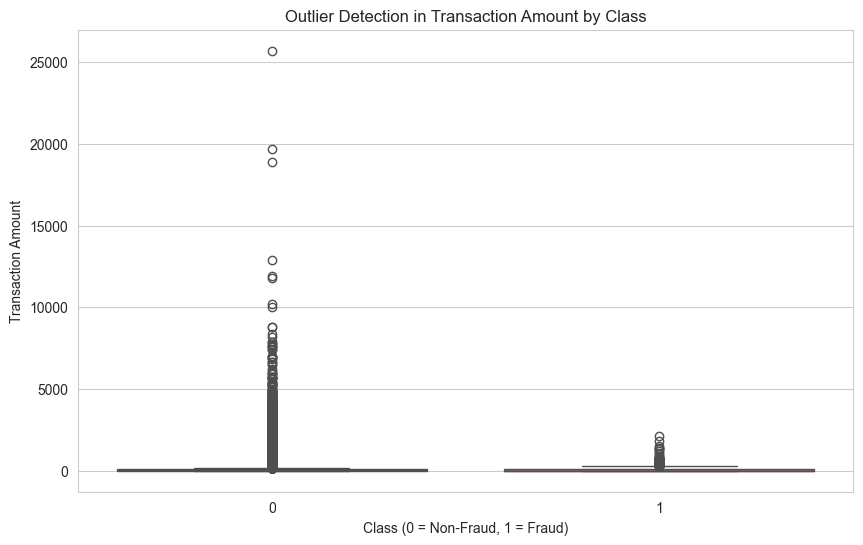

In [134]:
# Outlier detection in the 'Amount' feature
plt.figure(figsize=(10, 6))
sns.boxplot(x='Class', y='Amount', data=df, palette=['#2f7ed8', '#d6604d'])
plt.title("Outlier Detection in Transaction Amount by Class")
plt.xlabel("Class (0 = Non-Fraud, 1 = Fraud)")
plt.ylabel("Transaction Amount")
plt.show()

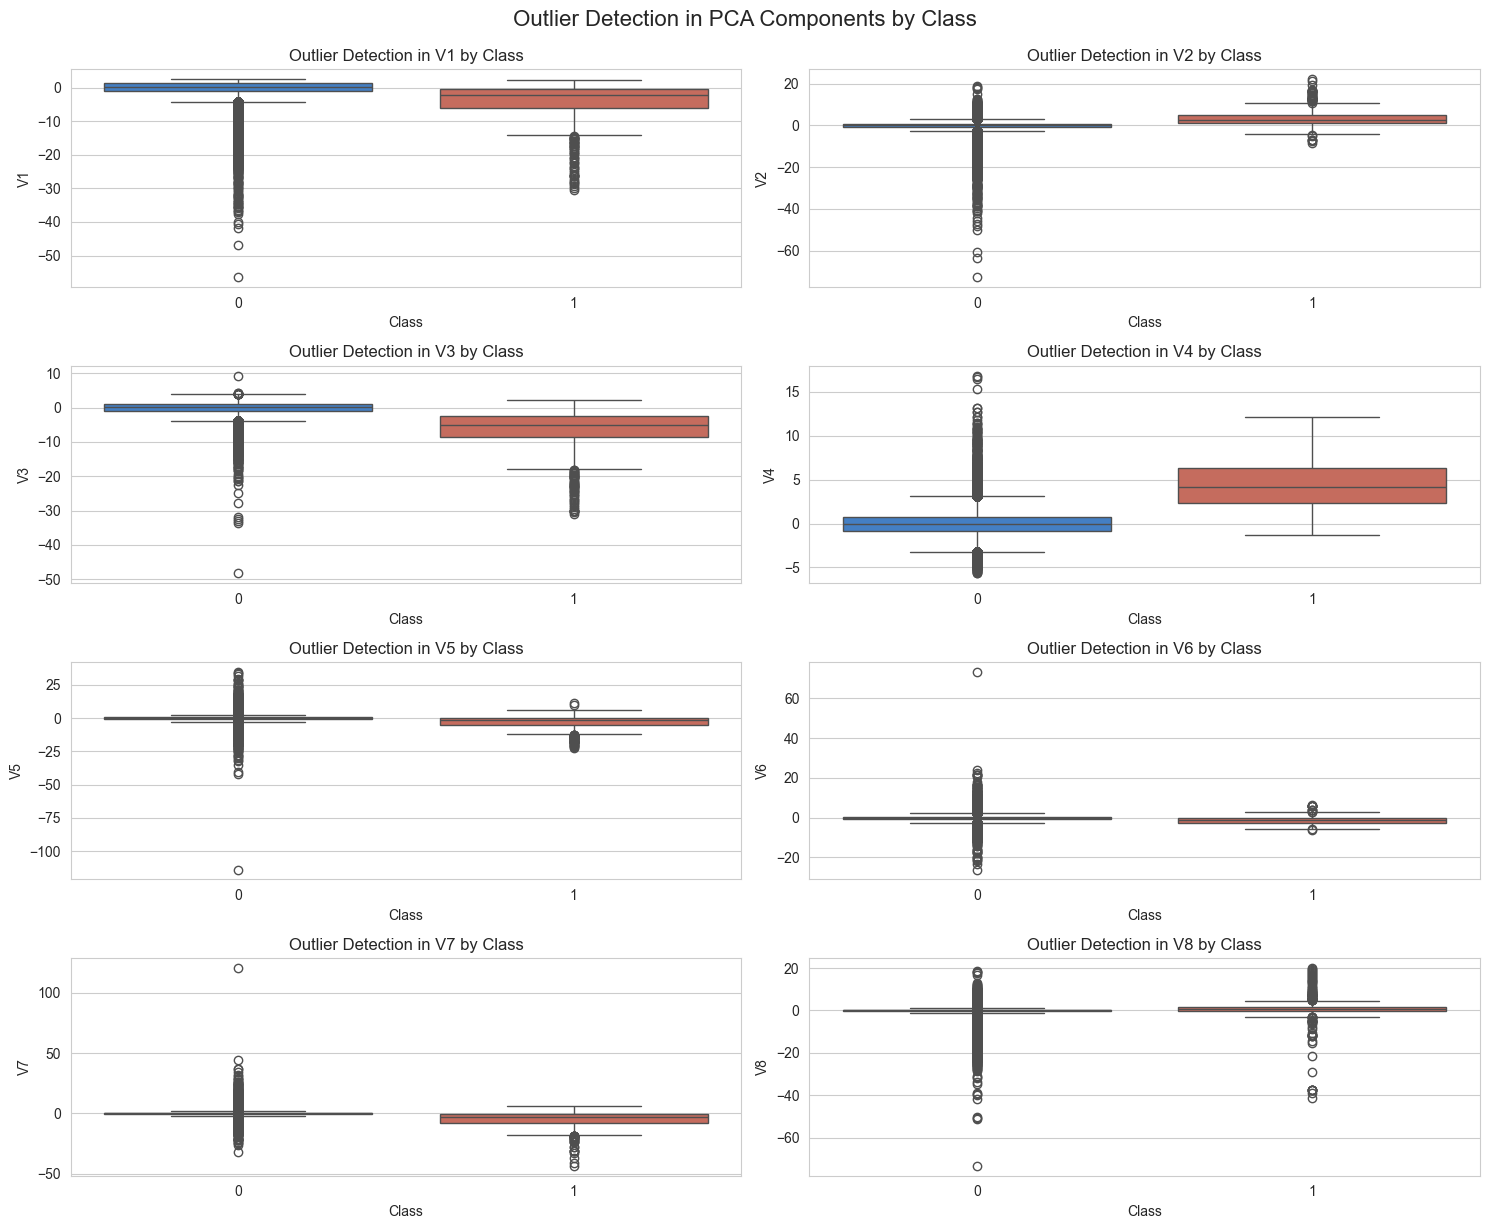

In [135]:
# Outlier detection in PCA components (V1 to V28)
plt.figure(figsize=(15, 12))
for i, component in enumerate(pca_components[:8], 1):  # Display first 8 components for illustration
    plt.subplot(4, 2, i)
    sns.boxplot(x='Class', y=component, data=df, palette=['#2f7ed8', '#d6604d'])
    plt.title(f"Outlier Detection in {component} by Class")
    plt.xlabel("Class")
    plt.ylabel(component)

plt.tight_layout()
plt.suptitle('Outlier Detection in PCA Components by Class', y=1.02, fontsize=16)
plt.show()

> **📌 Outlier Detection Insights**:
> - **Amount Feature Outliers**: Higher transaction amounts may indicate potential fraud, but non-fraud transactions also show some outliers.
> - **PCA Components Outliers**: Certain components may have more extreme values associated with fraud, helping to isolate key indicators.
> - **Anomaly Analysis**: Outliers in these features could help refine the model by focusing on unique fraud patterns.
> - **Fraud Analysis**: Outliers, especially in fraud cases, are critical to identifying patterns that set fraudulent transactions apart.


### 8. Skewness / Kurtosis & Distribution

In [136]:
# Check skewness for all numerical features
skewness = df.drop(columns=['Class', 'Amount Range']).apply(skew).sort_values(ascending=False)
print("Skewness of features:\n", skewness)

Skewness of features:
 Amount         16.977635
V28            11.192032
V21             3.592972
V7              2.553894
V6              1.826571
V10             1.187134
V4              0.676289
V26             0.576690
V9              0.554677
V11             0.356504
V19             0.109191
V13             0.065233
Time           -0.035567
V22            -0.213256
V18            -0.259879
V15            -0.308421
V25            -0.415790
Hour           -0.490468
V24            -0.552496
V16            -1.100960
V27            -1.170203
V14            -1.995165
V20            -2.037145
V3             -2.240144
V12            -2.278389
V5             -2.425889
V1             -3.280650
V17            -3.844894
V2             -4.624841
V23            -5.875109
V8             -8.521899
Fraud_Spike          NaN
dtype: float64


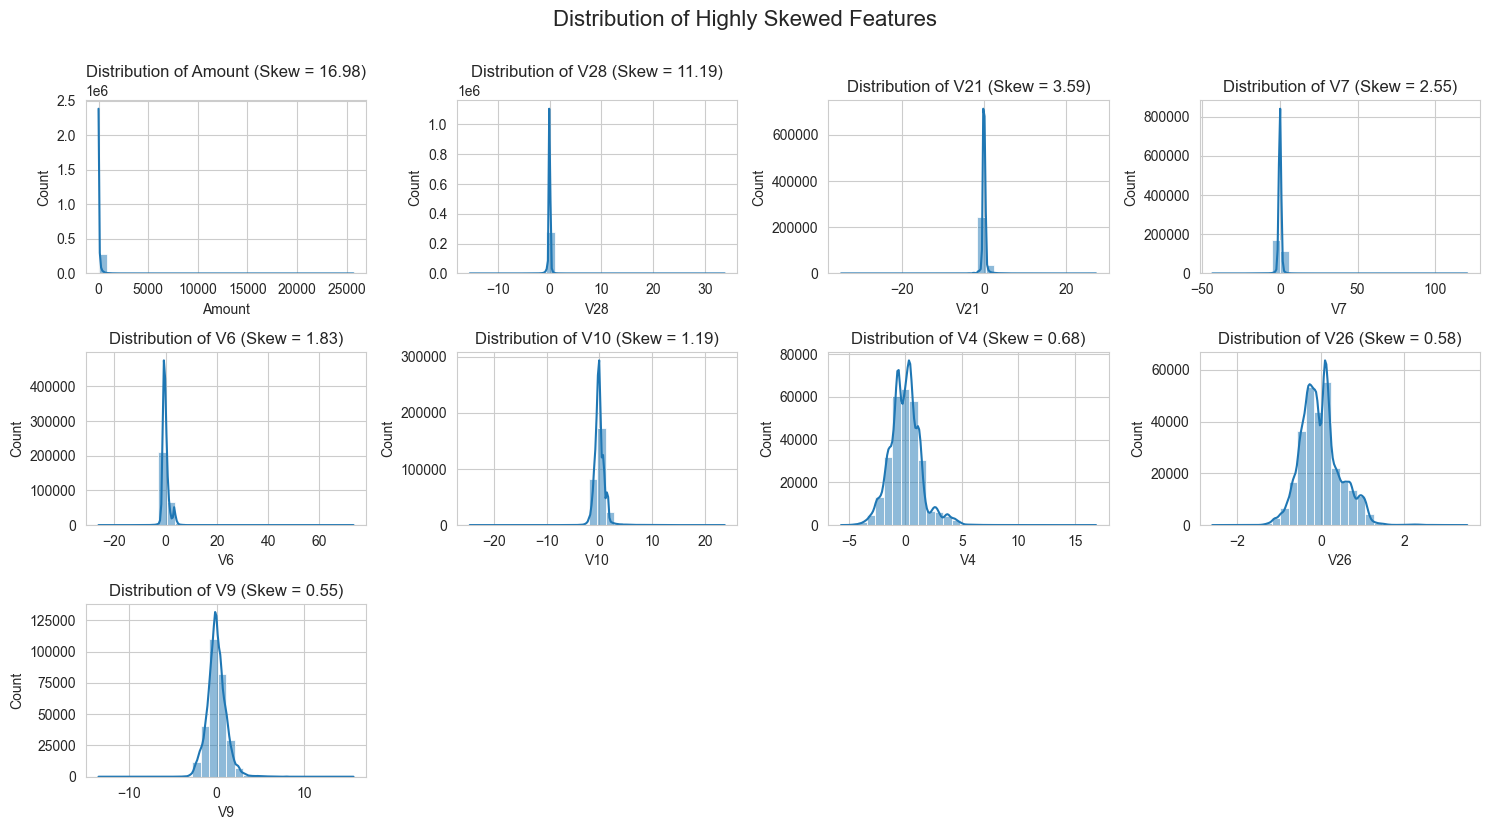

In [137]:
# Visualize distribution for skewed features
plt.figure(figsize=(15, 20))

# Plot histograms for highly skewed features
highly_skewed = skewness[skewness > 0.5].index
for i, feature in enumerate(highly_skewed, 1):
    plt.subplot(8, 4, i)
    sns.histplot(df[feature], kde=True, bins=30)
    plt.title(f"Distribution of {feature} (Skew = {skewness[feature]:.2f})")
    plt.xlabel(feature)

plt.tight_layout()
plt.suptitle('Distribution of Highly Skewed Features', y=1.02, fontsize=16)
plt.show()

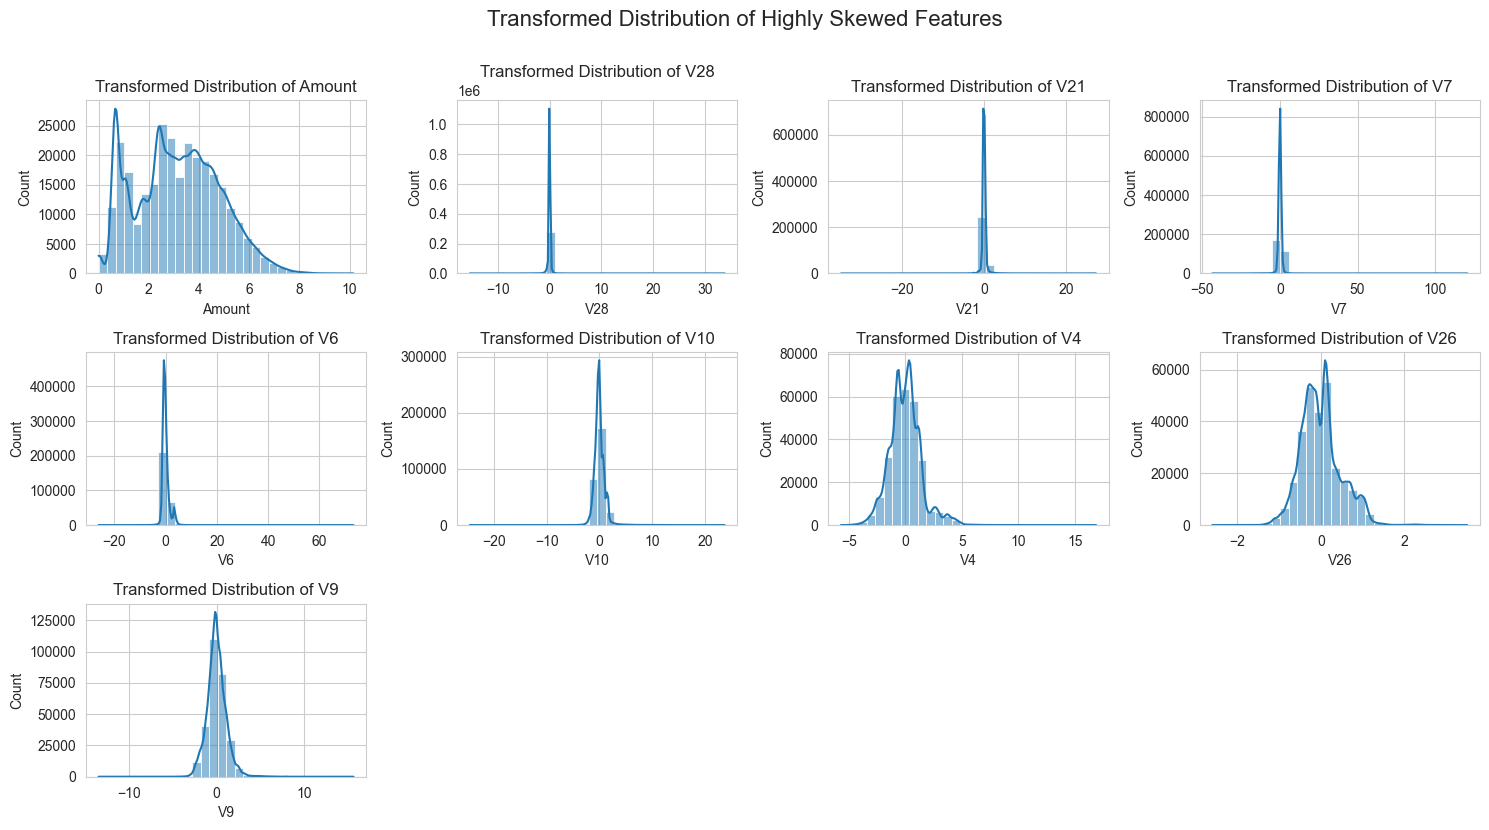

In [138]:
# Apply log transformation to highly skewed features for illustration
# Use caution: log transformation requires non-negative values, so handle zeroes if present
df[highly_skewed] = df[highly_skewed].apply(lambda x: np.log1p(x) if x.min() >= 0 else x)

# Visualize transformed distributions
plt.figure(figsize=(15, 20))
for i, feature in enumerate(highly_skewed, 1):
    plt.subplot(8, 4, i)
    sns.histplot(df[feature], kde=True, bins=30)
    plt.title(f"Transformed Distribution of {feature}")
    plt.xlabel(feature)

plt.tight_layout()
plt.suptitle('Transformed Distribution of Highly Skewed Features', y=1.02, fontsize=16)
plt.show()

> **📌 Skewness and Distribution Insights**:
> - **Skewed Features**: Many PCA components show skewness, with some requiring transformation for model stability.
> - **Potential Log Transformation**: Features with high positive skewness may benefit from log transformation to normalize the distribution.
> - **Impact on Modeling**: Addressing skewed distributions helps reduce model bias and improves prediction accuracy.
> - **Next Steps**: Analyze the transformed distributions to confirm whether further normalization or adjustments are needed.

In [139]:
# Calculate skewness and kurtosis for all numerical features
skewness = df.drop(columns=['Class', 'Amount Range']).apply(skew).sort_values(ascending=False)
kurt = df.drop(columns=['Class', 'Amount Range']).apply(kurtosis).sort_values(ascending=False)

# Display skewness and kurtosis
print("Skewness of features:\n", skewness)
print("\nKurtosis of features:\n", kurt)

Skewness of features:
 V28            11.192032
V21             3.592972
V7              2.553894
V6              1.826571
V10             1.187134
V4              0.676289
V26             0.576690
V9              0.554677
V11             0.356504
Amount          0.162702
V19             0.109191
V13             0.065233
Time           -0.035567
V22            -0.213256
V18            -0.259879
V15            -0.308421
V25            -0.415790
Hour           -0.490468
V24            -0.552496
V16            -1.100960
V27            -1.170203
V14            -1.995165
V20            -2.037145
V3             -2.240144
V12            -2.278389
V5             -2.425889
V1             -3.280650
V17            -3.844894
V2             -4.624841
V23            -5.875109
V8             -8.521899
Fraud_Spike          NaN
dtype: float64

Kurtosis of features:
 V28            933.381095
V23            440.080912
V7             405.600275
V20            271.011334
V27            244.984919
V8      

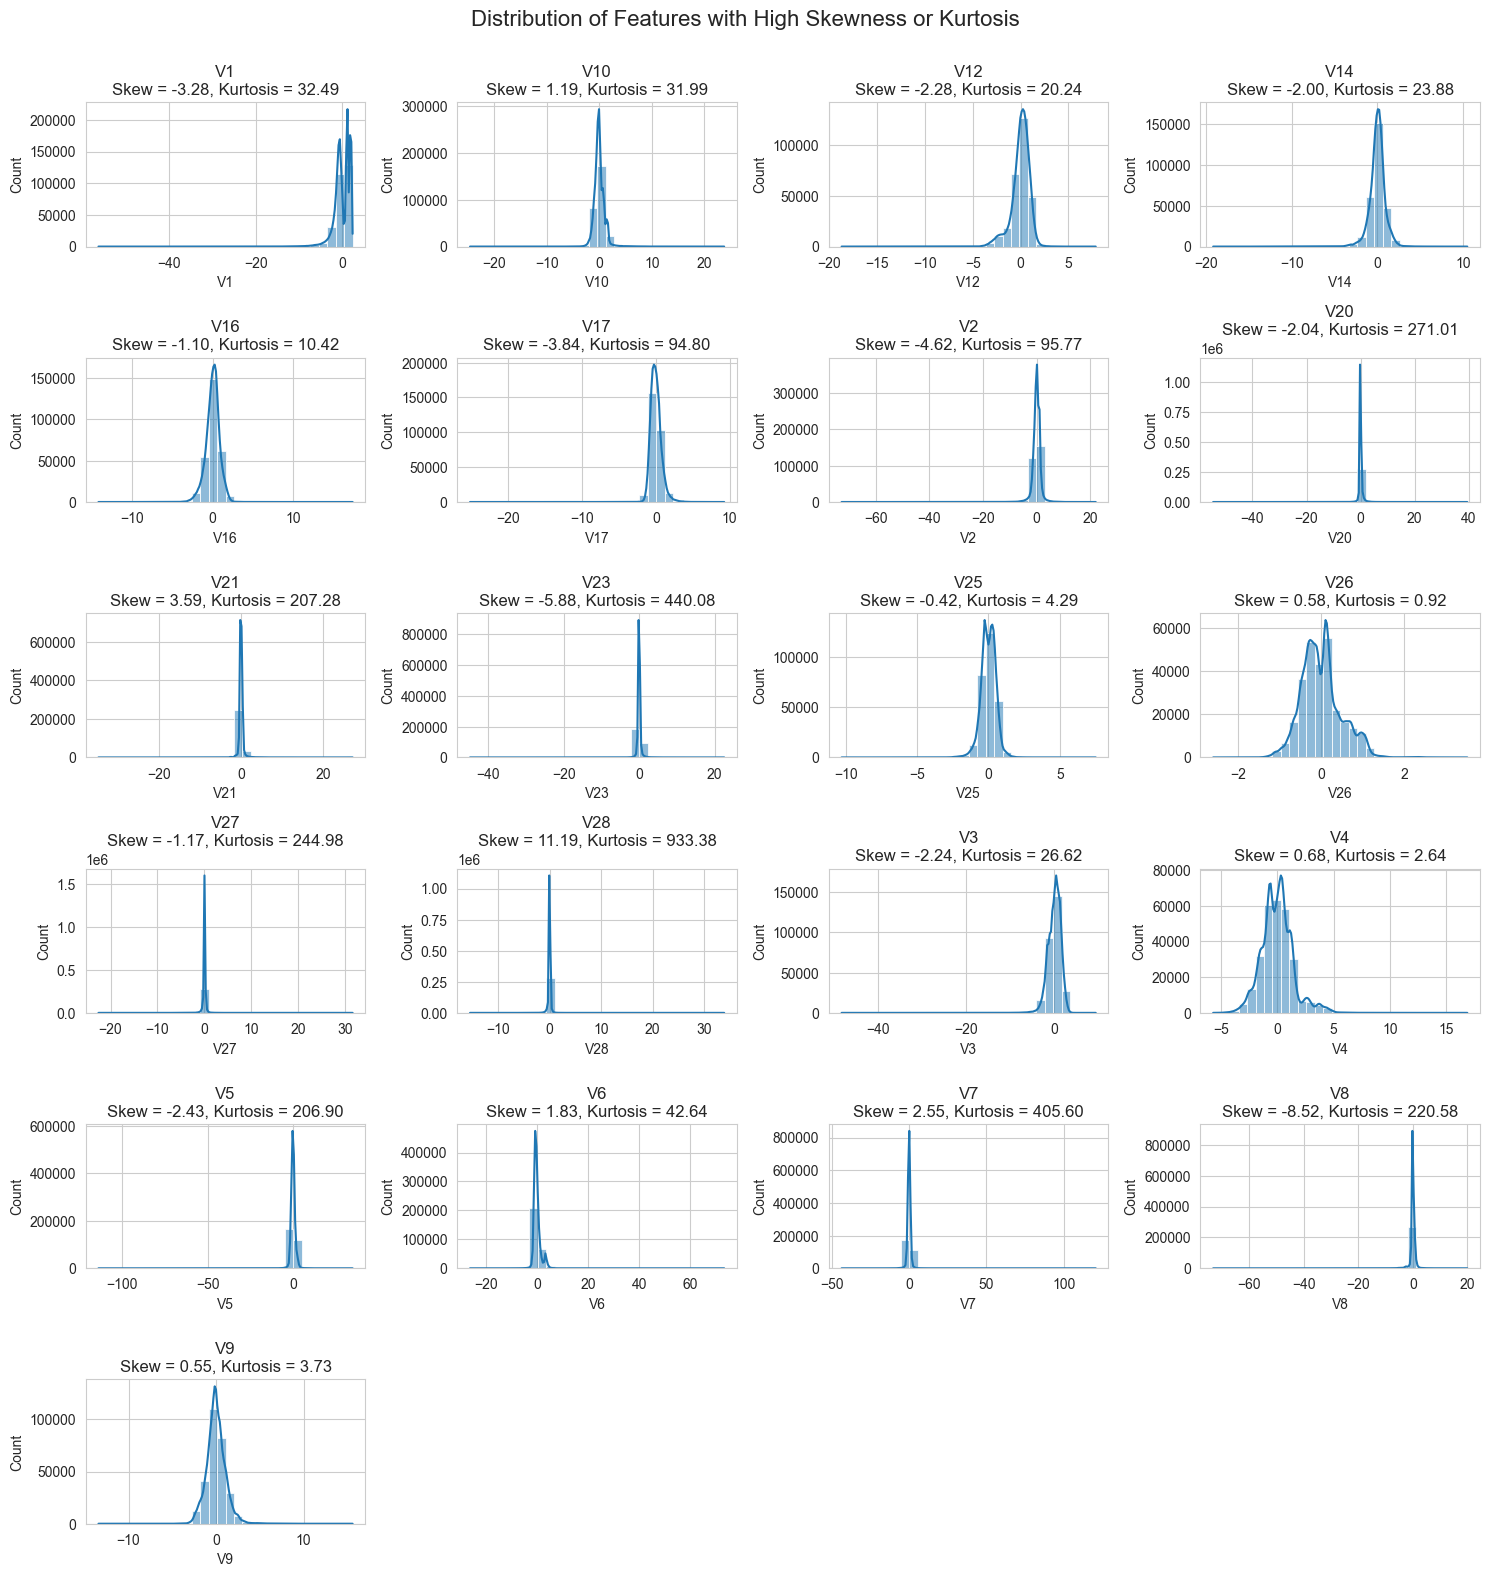

In [140]:
# Visualize distribution, skewness, and kurtosis for highly skewed or high-kurtosis features
highly_skewed_or_kurt = skewness[skewness > 0.5].index.union(kurt[kurt > 3].index)

plt.figure(figsize=(15, 20))
for i, feature in enumerate(highly_skewed_or_kurt, 1):
    plt.subplot(8, 4, i)
    sns.histplot(df[feature], kde=True, bins=30)
    plt.title(f"{feature}\nSkew = {skewness[feature]:.2f}, Kurtosis = {kurt[feature]:.2f}")
    plt.xlabel(feature)

plt.tight_layout()
plt.suptitle('Distribution of Features with High Skewness or Kurtosis', y=1.02, fontsize=16)
plt.show()

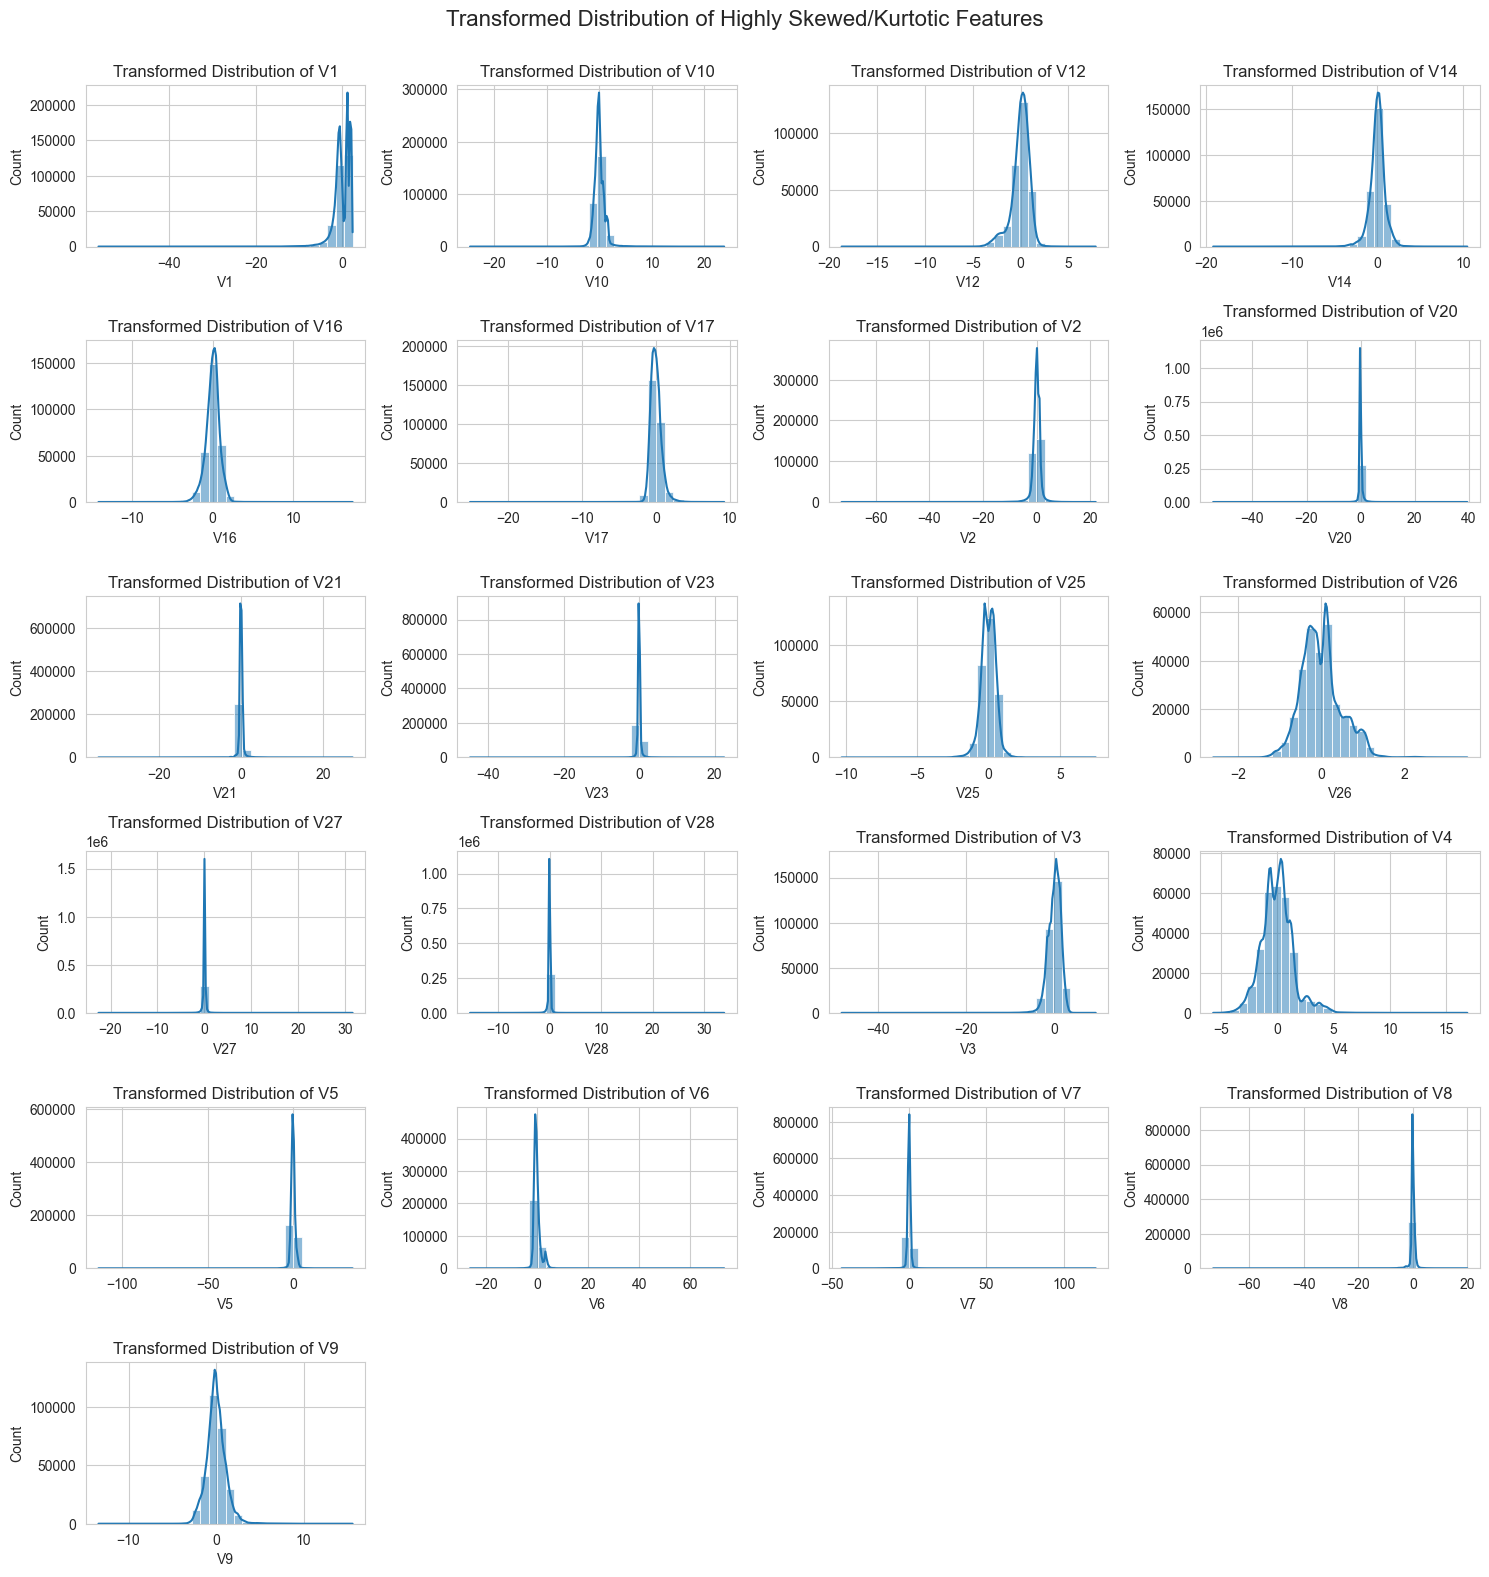

In [141]:
# Apply log transformation to highly skewed features (if necessary)
df[highly_skewed_or_kurt] = df[highly_skewed_or_kurt].apply(lambda x: np.log1p(x) if x.min() >= 0 else x)

# Visualize transformed distributions
plt.figure(figsize=(15, 20))
for i, feature in enumerate(highly_skewed_or_kurt, 1):
    plt.subplot(8, 4, i)
    sns.histplot(df[feature], kde=True, bins=30)
    plt.title(f"Transformed Distribution of {feature}")
    plt.xlabel(feature)

plt.tight_layout()
plt.suptitle('Transformed Distribution of Highly Skewed/Kurtotic Features', y=1.02, fontsize=16)
plt.show()

> **📌 Skewness and Kurtosis Insights**:
> - **Skewed and Kurtotic Features**: Several PCA components display high skewness or kurtosis, suggesting asymmetry and heavy tails.
> - **Extreme Outliers**: Features with high kurtosis may contain extreme values, indicating potential outliers that could impact model performance.
> - **Transformations**: Log transformations on skewed/kurtotic features can help normalize their distributions, reducing model sensitivity to extreme values.
> - **Enhanced Model Stability**: By addressing both skewness and kurtosis, the data becomes more suitable for machine learning, leading to improved accuracy and generalizability.

### 9. Feature Correlation with Class

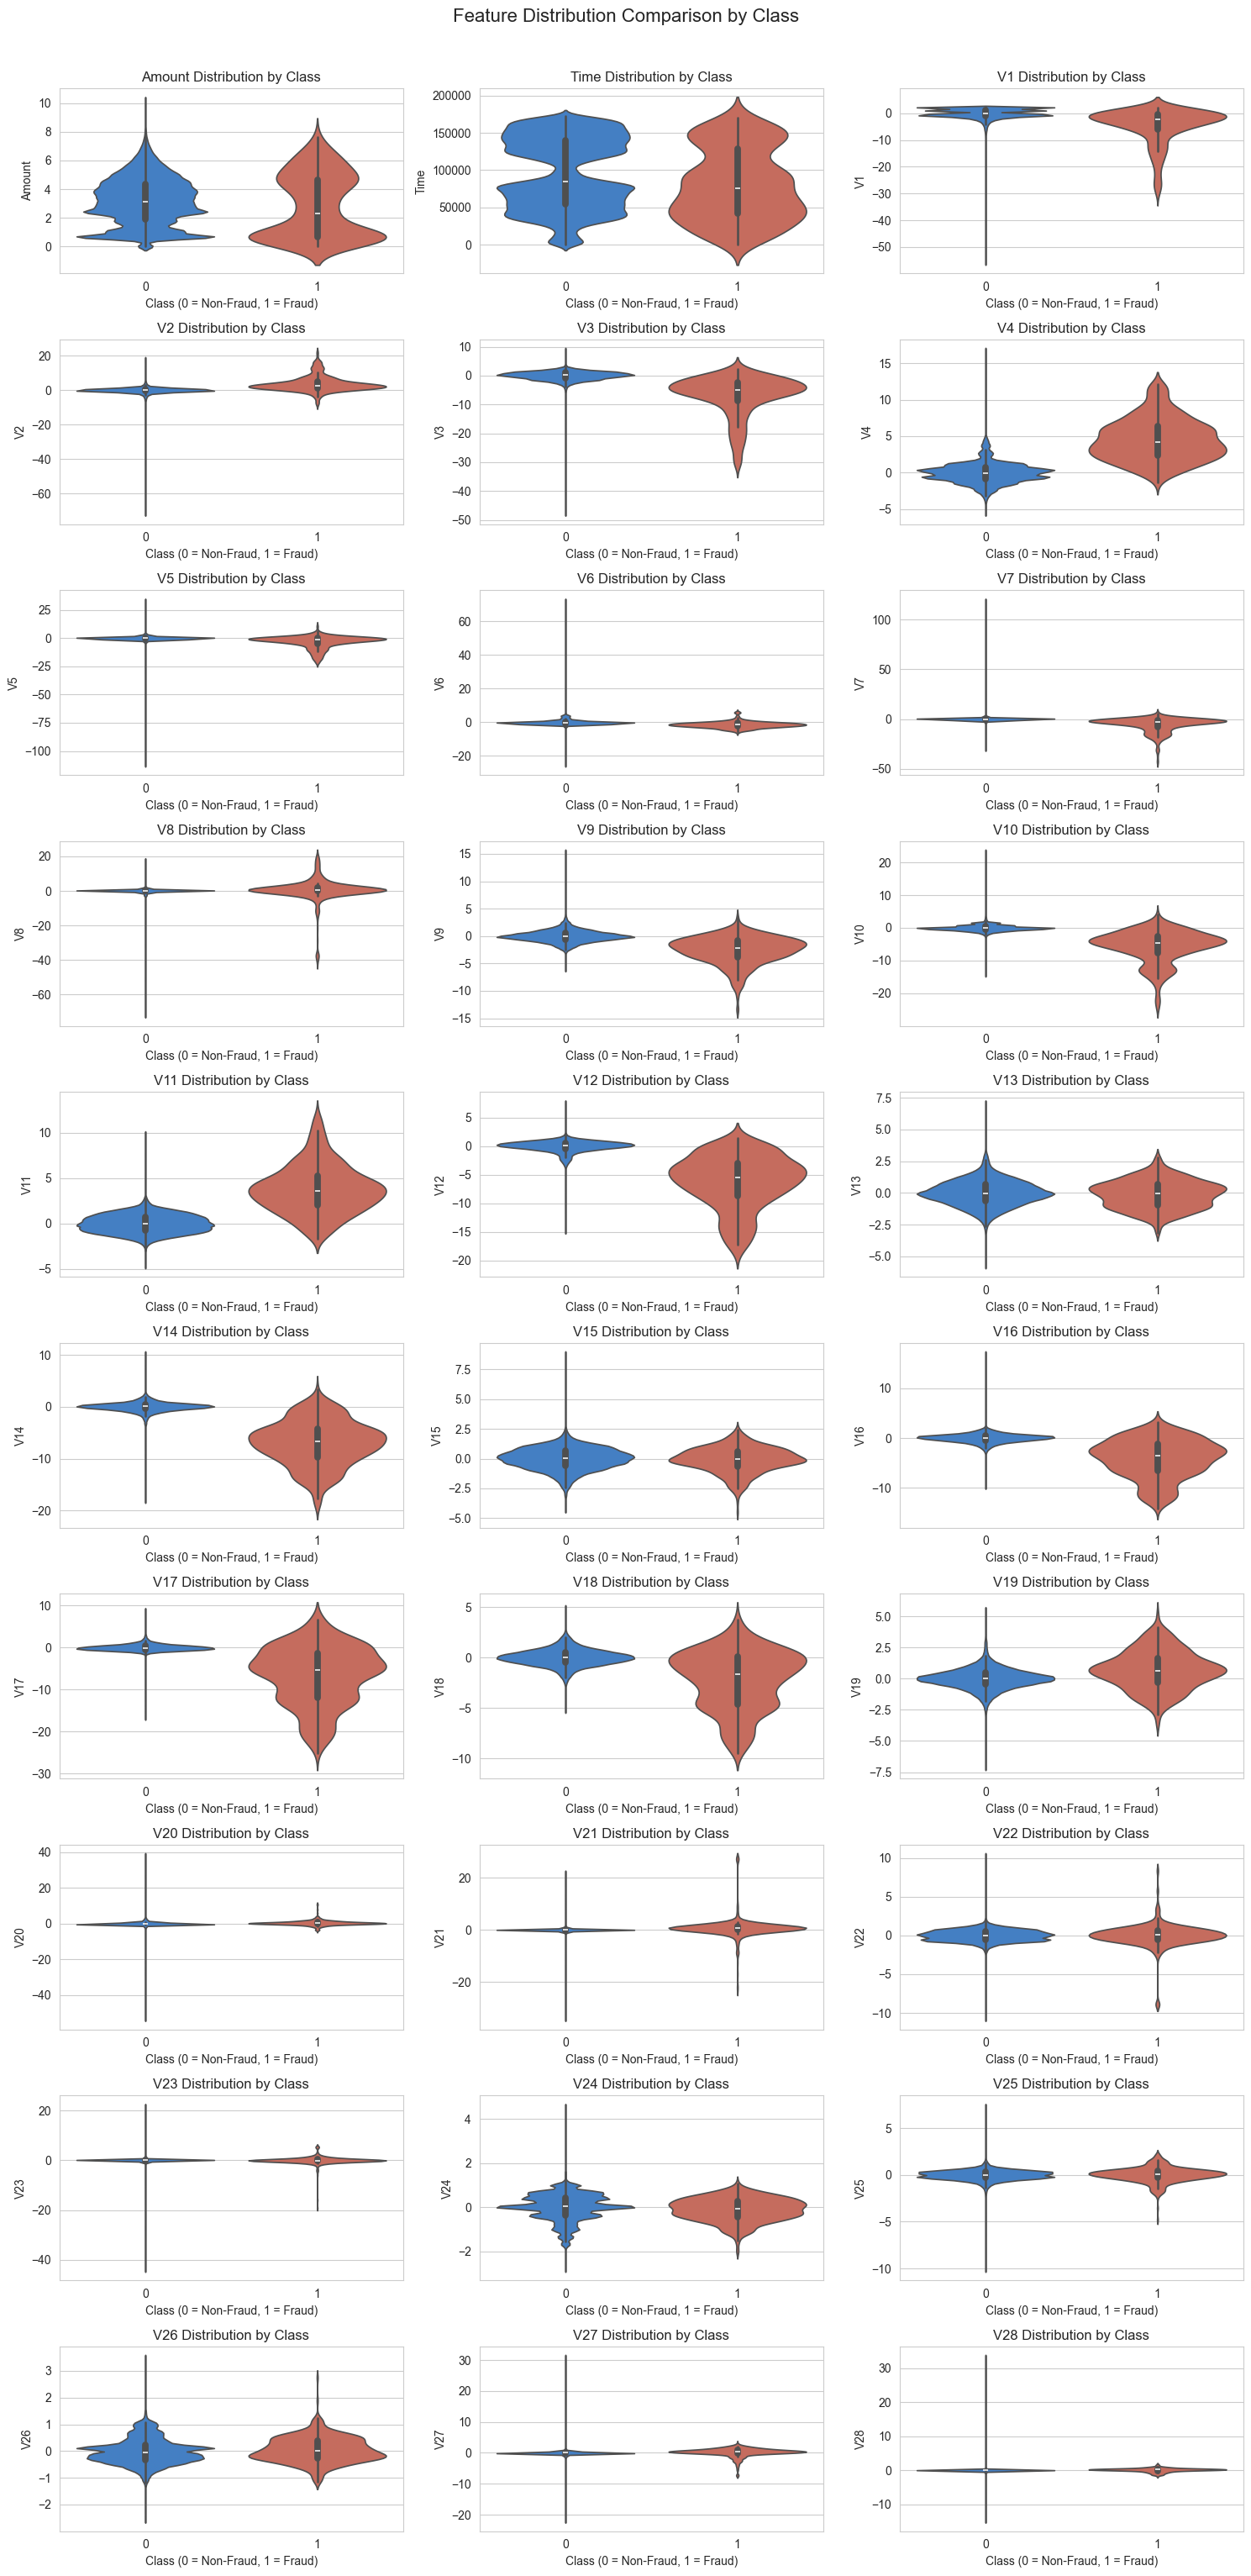

In [142]:
# Select features for correlation analysis with the target 'Class' variable
features_to_analyze = ['Amount', 'Time'] + [f'V{i}' for i in range(1, 29)]  # V1 to V28

# Set up plot for feature analysis by class
plt.figure(figsize=(15, 30))
for i, feature in enumerate(features_to_analyze, 1):
    plt.subplot(10, 3, i)
    sns.violinplot(x='Class', y=feature, data=df, palette=['#2f7ed8', '#d6604d'])
    plt.title(f'{feature} Distribution by Class')
    plt.xlabel('Class (0 = Non-Fraud, 1 = Fraud)')
    plt.ylabel(feature)

plt.tight_layout()
plt.suptitle("Feature Distribution Comparison by Class", y=1.02, fontsize=16)
plt.show()

In [143]:
# Mean and median comparison for fraud and non-fraud transactions
summary_stats = df.groupby('Class')[features_to_analyze].agg(['mean', 'median']).T
print("\nMean and Median of Features by Class:\n", summary_stats)


Mean and Median of Features by Class:
 Class                     0             1
Amount mean        3.152762      2.820596
       median      3.135494      2.327270
Time   mean    94838.202258  80746.806911
       median  84711.000000  75568.500000
V1     mean        0.008258     -4.771948
       median      0.020023     -2.342497
V2     mean       -0.006271      3.623778
       median      0.064070      2.717869
V3     mean        0.012171     -7.033281
       median      0.182158     -5.075257
V4     mean       -0.007860      4.542029
       median     -0.022405      4.177147
V5     mean        0.005453     -3.151225
       median     -0.053457     -1.522962
V6     mean        0.002419     -1.397737
       median     -0.273123     -1.424616
V7     mean        0.009637     -5.568731
       median      0.041138     -3.034402
V8     mean       -0.000987      0.570636
       median      0.022041      0.621508
V9     mean        0.004467     -2.581123
       median     -0.049964     -2.2

> **📌 Insights on Feature Correlation with Class**:
> - **Distinctive Patterns**: Several PCA components (e.g., `V4`, `V10`, etc.) display significant differences in distribution between fraudulent and non-fraudulent transactions, suggesting potential predictive power.
> - **Amount Feature**: The `Amount` feature shows distinct patterns, where certain amounts might be more common in fraud cases.
> - **High Correlation**: Features with visible separation by class could serve as strong indicators for fraud detection in modeling.
> - **Next Steps**: Consider including features with high differentiation in the final model, as these might contribute significantly to identifying fraud.

### 10. Pairwise Relationships

In [144]:
# # Select a subset of features for pairplot to avoid too many combinations 
# selected_features = ['V1', 'V2', 'V3', 'V4', 'Amount', 'Class']  

# # Create a pairplot
# plt.figure(figsize=(12, 10))
# sns.pairplot(df[selected_features], hue='Class', palette={0: '#2f7ed8', 1: '#d6604d'}, plot_kws={'alpha': 0.5})
# plt.suptitle("Pairwise Relationships Between Features for Fraud and Non-Fraud Transactions", y=1.02)
# plt.show()

> **📌 Insights on Pairwise Relationships**:
> - **Cluster Detection**: The pairwise plot reveals any clusters or separations between fraudulent and non-fraudulent transactions. Clear separations between clusters could suggest a distinct grouping in certain feature combinations, useful for classification.
> - **Potential Interactions**: Observing the distributions for fraud vs. non-fraud transactions helps in identifying important feature interactions, which may indicate relationships that are particularly indicative of fraudulent behavior.
> - **Feature Pairs**: Certain PCA components (like V1, V2, etc.) might show more pronounced differences between fraud and non-fraud, supporting their value in model training.
> - **Further Investigation**: For feature pairs showing clusters or unique patterns, these can be emphasized in further modeling or highlighted with specialized interaction terms.

## Data Preprocessing and Cleaning

In [145]:
# Check for Missing Values
missing_values = df.isnull().sum()
print("Missing Values per Column:\n", missing_values[missing_values > 0])

Missing Values per Column:
 Fraud_Spike    999
dtype: int64


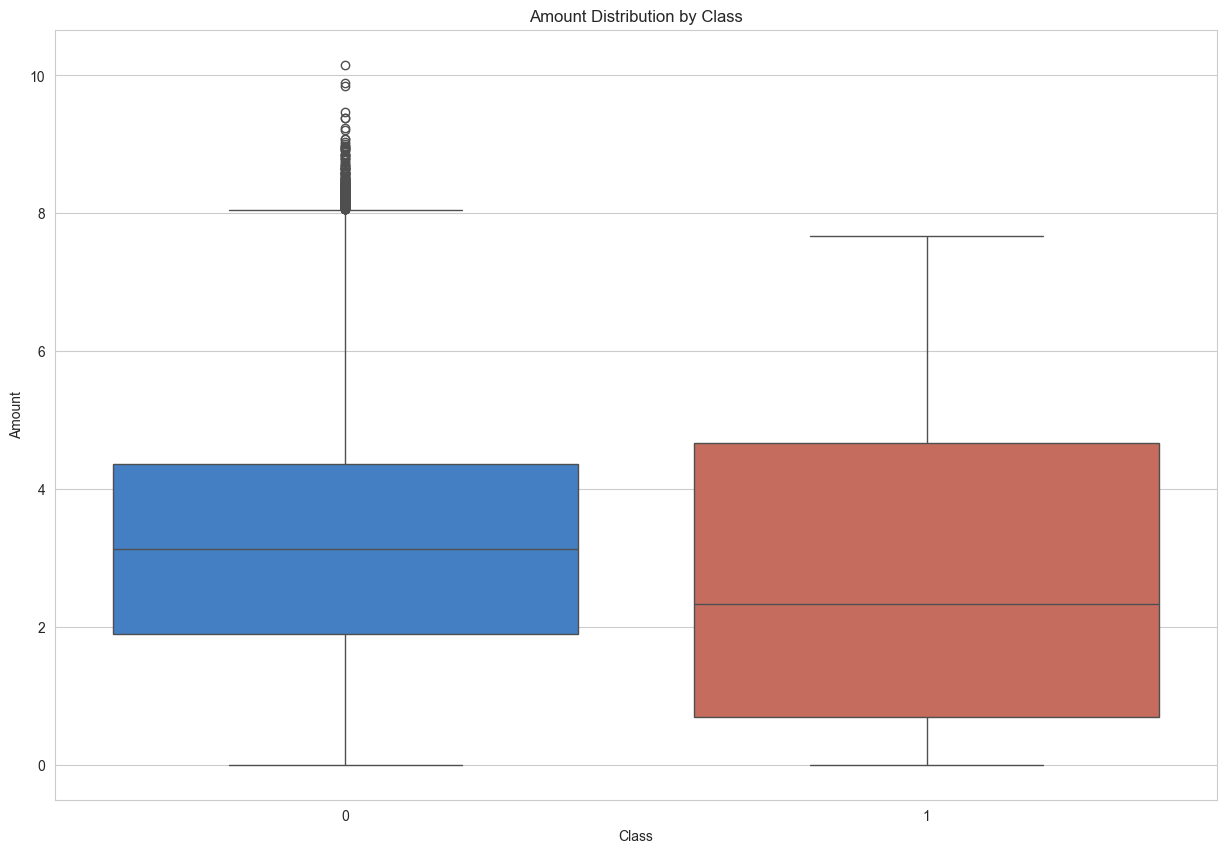

In [146]:
# 2. Outlier Detection and Handling
# Visualize outliers for 'Amount' and PCA components
plt.figure(figsize=(15, 10))
sns.boxplot(data=df, x='Class', y='Amount', palette=['#2f7ed8', '#d6604d'])
plt.title("Amount Distribution by Class")
plt.show()

In [147]:
# Detect outliers using Z-score for 'Amount'
# Calculate Z-scores
z_scores = np.abs((df['Amount'] - df['Amount'].mean()) / df['Amount'].std())
outliers = np.where(z_scores > 3)[0]  # Set a threshold for outliers (e.g., z-score > 3)
print(f"Number of Outliers in 'Amount': {len(outliers)}")

Number of Outliers in 'Amount': 218


In [148]:
# 3. Address Data Inconsistencies
# Check for unique values in categorical columns if present
print("Unique values in 'Amount Range':\n", df['Amount Range'].unique())

# Convert categories to a consistent format if necessary (example below)
df['Amount Range'] = df['Amount Range'].str.lower().str.strip()  # Adjust if necessary

# Final Confirmation of Data Cleaning
print("Data Summary After Preprocessing:")
print(df.info())
print(df.describe())

Unique values in 'Amount Range':
 ['101-200', '0-50', '201-500', '51-100', '1001-5000', '501-1000', '5001-10000', '10001+']
Categories (8, object): ['0-50' < '51-100' < '101-200' < '201-500' < '501-1000' < '1001-5000' < '5001-10000' < '10001+']
Data Summary After Preprocessing:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 34 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Time          284807 non-null  float64
 1   V1            284807 non-null  float64
 2   V2            284807 non-null  float64
 3   V3            284807 non-null  float64
 4   V4            284807 non-null  float64
 5   V5            284807 non-null  float64
 6   V6            284807 non-null  float64
 7   V7            284807 non-null  float64
 8   V8            284807 non-null  float64
 9   V9            284807 non-null  float64
 10  V10           284807 non-null  float64
 11  V11           284807 non-null  fl

In [149]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 34 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Time          284807 non-null  float64
 1   V1            284807 non-null  float64
 2   V2            284807 non-null  float64
 3   V3            284807 non-null  float64
 4   V4            284807 non-null  float64
 5   V5            284807 non-null  float64
 6   V6            284807 non-null  float64
 7   V7            284807 non-null  float64
 8   V8            284807 non-null  float64
 9   V9            284807 non-null  float64
 10  V10           284807 non-null  float64
 11  V11           284807 non-null  float64
 12  V12           284807 non-null  float64
 13  V13           284807 non-null  float64
 14  V14           284807 non-null  float64
 15  V15           284807 non-null  float64
 16  V16           284807 non-null  float64
 17  V17           284807 non-null  float64
 18  V18 

In [150]:
df.head()

Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V24       V25       V26       V27       V28  \
0  0.098698  0.363787  ...  0.066928  0.128539 -0.189115  0.133558 -0.021053   
1  0.085102 -0.255425  ... -0.339846  0.167170  0.125895 -0.008983  0.014724   
2  0.247676 -1.514654  ... -0.689281 -0.327642 -0.139097 -0.055353 -0.059752   
3  0.377436 -1.387024  ... -1.175575  0.647376 -0.221929  0.062723  0.061458   
4 -0.270533  0.817739  ...  0.141267 -0.206010  0.502292  0.219422  0.215153   

     Amount  Class  Hour  Fraud_Spike  Amount Range  
0  5.014760      0   0.0          NaN       101-200  
1  1.305626      0   0.0          NaN          0-50  
2  5.939276      0   0.0          NaN       201-500  
3  4.824306      0   0.0          NaN       101-200  
4  4.262539      0   0.0          NaN        51-100  

[5 rows x 34 columns]

### Data Scaling

In [151]:
df.head()

Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V24       V25       V26       V27       V28  \
0  0.098698  0.363787  ...  0.066928  0.128539 -0.189115  0.133558 -0.021053   
1  0.085102 -0.255425  ... -0.339846  0.167170  0.125895 -0.008983  0.014724   
2  0.247676 -1.514654  ... -0.689281 -0.327642 -0.139097 -0.055353 -0.059752   
3  0.377436 -1.387024  ... -1.175575  0.647376 -0.221929  0.062723  0.061458   
4 -0.270533  0.817739  ...  0.141267 -0.206010  0.502292  0.219422  0.215153   

     Amount  Class  Hour  Fraud_Spike  Amount Range  
0  5.014760      0   0.0          NaN       101-200  
1  1.305626      0   0.0          NaN          0-50  
2  5.939276      0   0.0          NaN       201-500  
3  4.824306      0   0.0          NaN       101-200  
4  4.262539      0   0.0          NaN        51-100  

[5 rows x 34 columns]

In [152]:
# Since most of our data has already been scaled we should scale the columns that are left to scale (Amount, Time, Hour, Fraud_Spike, Amount Range)

from sklearn.preprocessing import RobustScaler

# Create an instance of the LabelEncoder
rob_scaler = RobustScaler()

# Apply Label Encoding to the 'Amount Range' feature
df['Time'] = rob_scaler.fit_transform(df['Time'].values.reshape(-1, 1))
df['Amount'] = rob_scaler.fit_transform(df['Amount'].values.reshape(-1, 1))
df['Hour'] = rob_scaler.fit_transform(df['Hour'].values.reshape(-1, 1))

#drop the amount range column and fraud spike column
df.drop(['Amount Range'], axis=1, inplace=True)
df.drop(['Fraud_Spike'], axis=1, inplace=True)

# Display the first few rows to check the changes
df.head()

Time        V1        V2        V3        V4        V5        V6  \
0 -0.994983 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388   
1 -0.994983  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361   
2 -0.994972 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499   
3 -0.994972 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203   
4 -0.994960 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921   

         V7        V8        V9  ...       V22       V23       V24       V25  \
0  0.239599  0.098698  0.363787  ...  0.277838 -0.110474  0.066928  0.128539   
1 -0.078803  0.085102 -0.255425  ... -0.638672  0.101288 -0.339846  0.167170   
2  0.791461  0.247676 -1.514654  ...  0.771679  0.909412 -0.689281 -0.327642   
3  0.237609  0.377436 -1.387024  ...  0.005274 -0.190321 -1.175575  0.647376   
4  0.592941 -0.270533  0.817739  ...  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28    Amount  Class      Hour  
0 -0.189115  0.133558 -0.021053  0.760297      0 -1.666667  
1  0.125895 -0.008983  0.014724 -0.740312      0 -1.666667  
2 -0.139097 -0.055353 -0.059752  1.134330      0 -1.666667  
3 -0.221929  0.062723  0.061458  0.683245      0 -1.666667  
4  0.502292  0.219422  0.215153  0.455970      0 -1.666667  

[5 rows x 32 columns]

In [153]:
scaled_time = df['Time']
scaled_amount = df['Amount']
scaled_hour = df['Hour']

df.drop(['Time', 'Amount', 'Hour'], axis=1, inplace=True)

df.insert(0, 'Time', scaled_time)
df.insert(29, 'Amount', scaled_amount)
df.insert(31, 'Hour', scaled_hour)

df.head()

Time        V1        V2        V3        V4        V5        V6  \
0 -0.994983 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388   
1 -0.994983  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361   
2 -0.994972 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499   
3 -0.994972 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203   
4 -0.994960 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921   

         V7        V8        V9  ...       V22       V23       V24       V25  \
0  0.239599  0.098698  0.363787  ...  0.277838 -0.110474  0.066928  0.128539   
1 -0.078803  0.085102 -0.255425  ... -0.638672  0.101288 -0.339846  0.167170   
2  0.791461  0.247676 -1.514654  ...  0.771679  0.909412 -0.689281 -0.327642   
3  0.237609  0.377436 -1.387024  ...  0.005274 -0.190321 -1.175575  0.647376   
4  0.592941 -0.270533  0.817739  ...  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28    Amount  Class      Hour  
0 -0.189115  0.133558 -0.021053  0.760297      0 -1.666667  
1  0.125895 -0.008983  0.014724 -0.740312      0 -1.666667  
2 -0.139097 -0.055353 -0.059752  1.134330      0 -1.666667  
3 -0.221929  0.062723  0.061458  0.683245      0 -1.666667  
4  0.502292  0.219422  0.215153  0.455970      0 -1.666667  

[5 rows x 32 columns]

### Splitting The Dataset

In [154]:
# splitting the data into features and target
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import KFold, StratifiedKFold

X = df.drop('Class', axis=1)
y = df['Class']

sss = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

for train_index, test_index in sss.split(X, y):
    print("Train:", train_index, "Test:", test_index)
    original_Xtrain, original_Xtest = X.iloc[train_index], X.iloc[test_index]
    original_ytrain, original_ytest = y.iloc[train_index], y.iloc[test_index]

# We already have X_train and y_train for undersample data thats why I am using original to distinguish and to not overwrite these variables.
# original_Xtrain, original_Xtest, original_ytrain, original_ytest = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the Distribution of the labels


# Turn into an array
original_Xtrain = original_Xtrain.values
original_Xtest = original_Xtest.values
original_ytrain = original_ytrain.values
original_ytest = original_ytest.values

# See if both the train and test label distribution are similarly distributed
train_unique_label, train_counts_label = np.unique(original_ytrain, return_counts=True)
test_unique_label, test_counts_label = np.unique(original_ytest, return_counts=True)
print('-' * 100)

print('Label Distributions: \n')
print(train_counts_label/ len(original_ytrain))
print(test_counts_label/ len(original_ytest))

Train: [ 30473  30496  31002 ... 284804 284805 284806] Test: [    0     1     2 ... 57017 57018 57019]
Train: [     0      1      2 ... 284804 284805 284806] Test: [ 30473  30496  31002 ... 113964 113965 113966]
Train: [     0      1      2 ... 284804 284805 284806] Test: [ 81609  82400  83053 ... 170946 170947 170948]
Train: [     0      1      2 ... 284804 284805 284806] Test: [150654 150660 150661 ... 227866 227867 227868]
Train: [     0      1      2 ... 227866 227867 227868] Test: [212516 212644 213092 ... 284804 284805 284806]
----------------------------------------------------------------------------------------------------
Label Distributions: 

[0.99827076 0.00172924]
[0.99827952 0.00172048]


In [155]:
print('No Frauds', round(df['Class'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Frauds', round(df['Class'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

No Frauds 99.83 % of the dataset
Frauds 0.17 % of the dataset


## Random Undersampling and Oversampling

In [156]:
# our classes are highly skewed, we should make them equivalent in order to have a normal distribution of the classes

# lets suffle the data before sampling
df = df.sample(frac=1)

# amount of fraud classes 492 rows.
fraud_df = df.loc[df['Class'] == 1]
non_fraud_df = df.loc[df['Class'] == 0][:492]

norm_distributed_df = pd.concat([fraud_df, non_fraud_df])

# Shuffle dataframe rows
new_df = norm_distributed_df.sample(frac=1, random_state=42)

new_df.head()

Time         V1         V2         V3        V4         V5  \
170824  0.419166  -0.440976   0.694410   1.761931 -0.418721   0.065784   
15166  -0.683384 -18.474868  11.586381 -21.402917  6.038515 -14.451158   
97317  -0.217695  -2.291108   2.311780   1.547719 -1.195151   1.215610   
41569  -0.516336  -2.377533   0.520539  -8.094139  8.005351   2.640750   
81609  -0.301707  -2.326922  -3.348439  -3.513408  3.175060  -2.815137   

              V6         V7         V8        V9  ...       V22       V23  \
170824 -0.228672   0.732698  -0.373250  1.007912  ...  1.095847 -0.332606   
15166  -4.146524 -14.856124  12.431140 -4.053353  ... -1.251138 -0.396219   
97317  -0.364814   2.661582  -2.160301  3.530951  ... -0.663375 -0.328952   
41569  -3.381586  -1.934372   0.562322 -3.104027  ...  0.721100  2.661291   
81609  -0.203363  -0.892144   0.333226 -0.802005  ... -0.695902 -1.478490   

             V24       V25       V26       V27       V28    Amount  Class  \
170824  0.032926 -0.204973 -0.204045  0.247900 -0.157331 -0.082223      0   
15166   0.095706  1.322751 -0.217955  1.628793  0.482248  0.598574      1   
97317  -0.108434  0.228975 -0.176779 -0.221002 -1.485071 -0.338593      0   
41569  -0.508620 -0.401657  0.587611  0.500326  0.551760 -0.988103      1   
81609  -0.061553  0.236155  0.531911  0.302324  0.536375  1.659538      1   

            Hour  
170824 -0.666667  
15166  -0.888889  
97317   0.333333  
41569  -0.444444  
81609   0.111111  

[5 rows x 32 columns]

In [157]:
new_df.shape

(984, 32)

### Distribution and Correlation

In [158]:
print('No Frauds', round(new_df['Class'].value_counts()[0]/len(new_df) * 100,2), '% of the dataset')
print('Frauds', round(new_df['Class'].value_counts()[1]/len(new_df) * 100,2), '% of the dataset')

No Frauds 50.0 % of the dataset
Frauds 50.0 % of the dataset


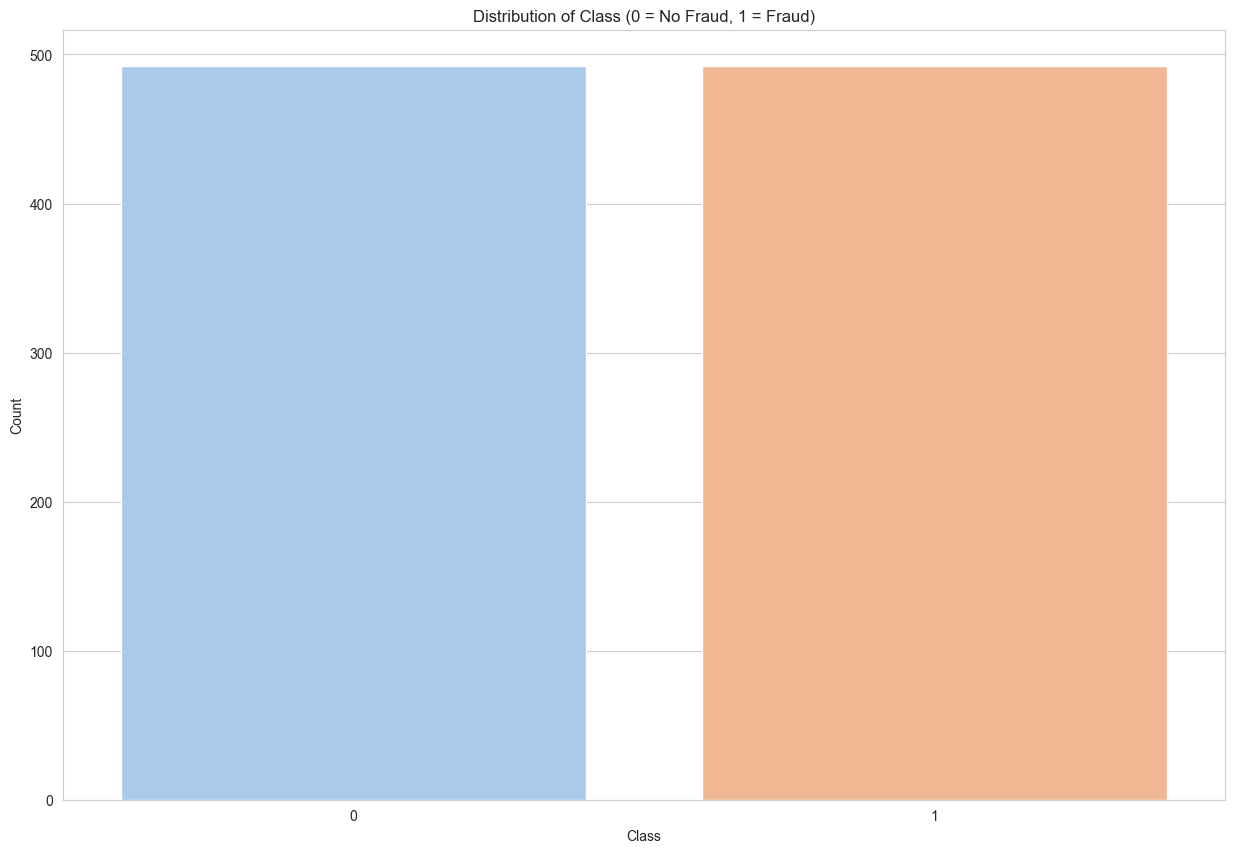

In [159]:
plt.figure(figsize=(15, 10))
sns.countplot(x='Class', data=new_df, palette='pastel')
plt.title('Distribution of Class (0 = No Fraud, 1 = Fraud)')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

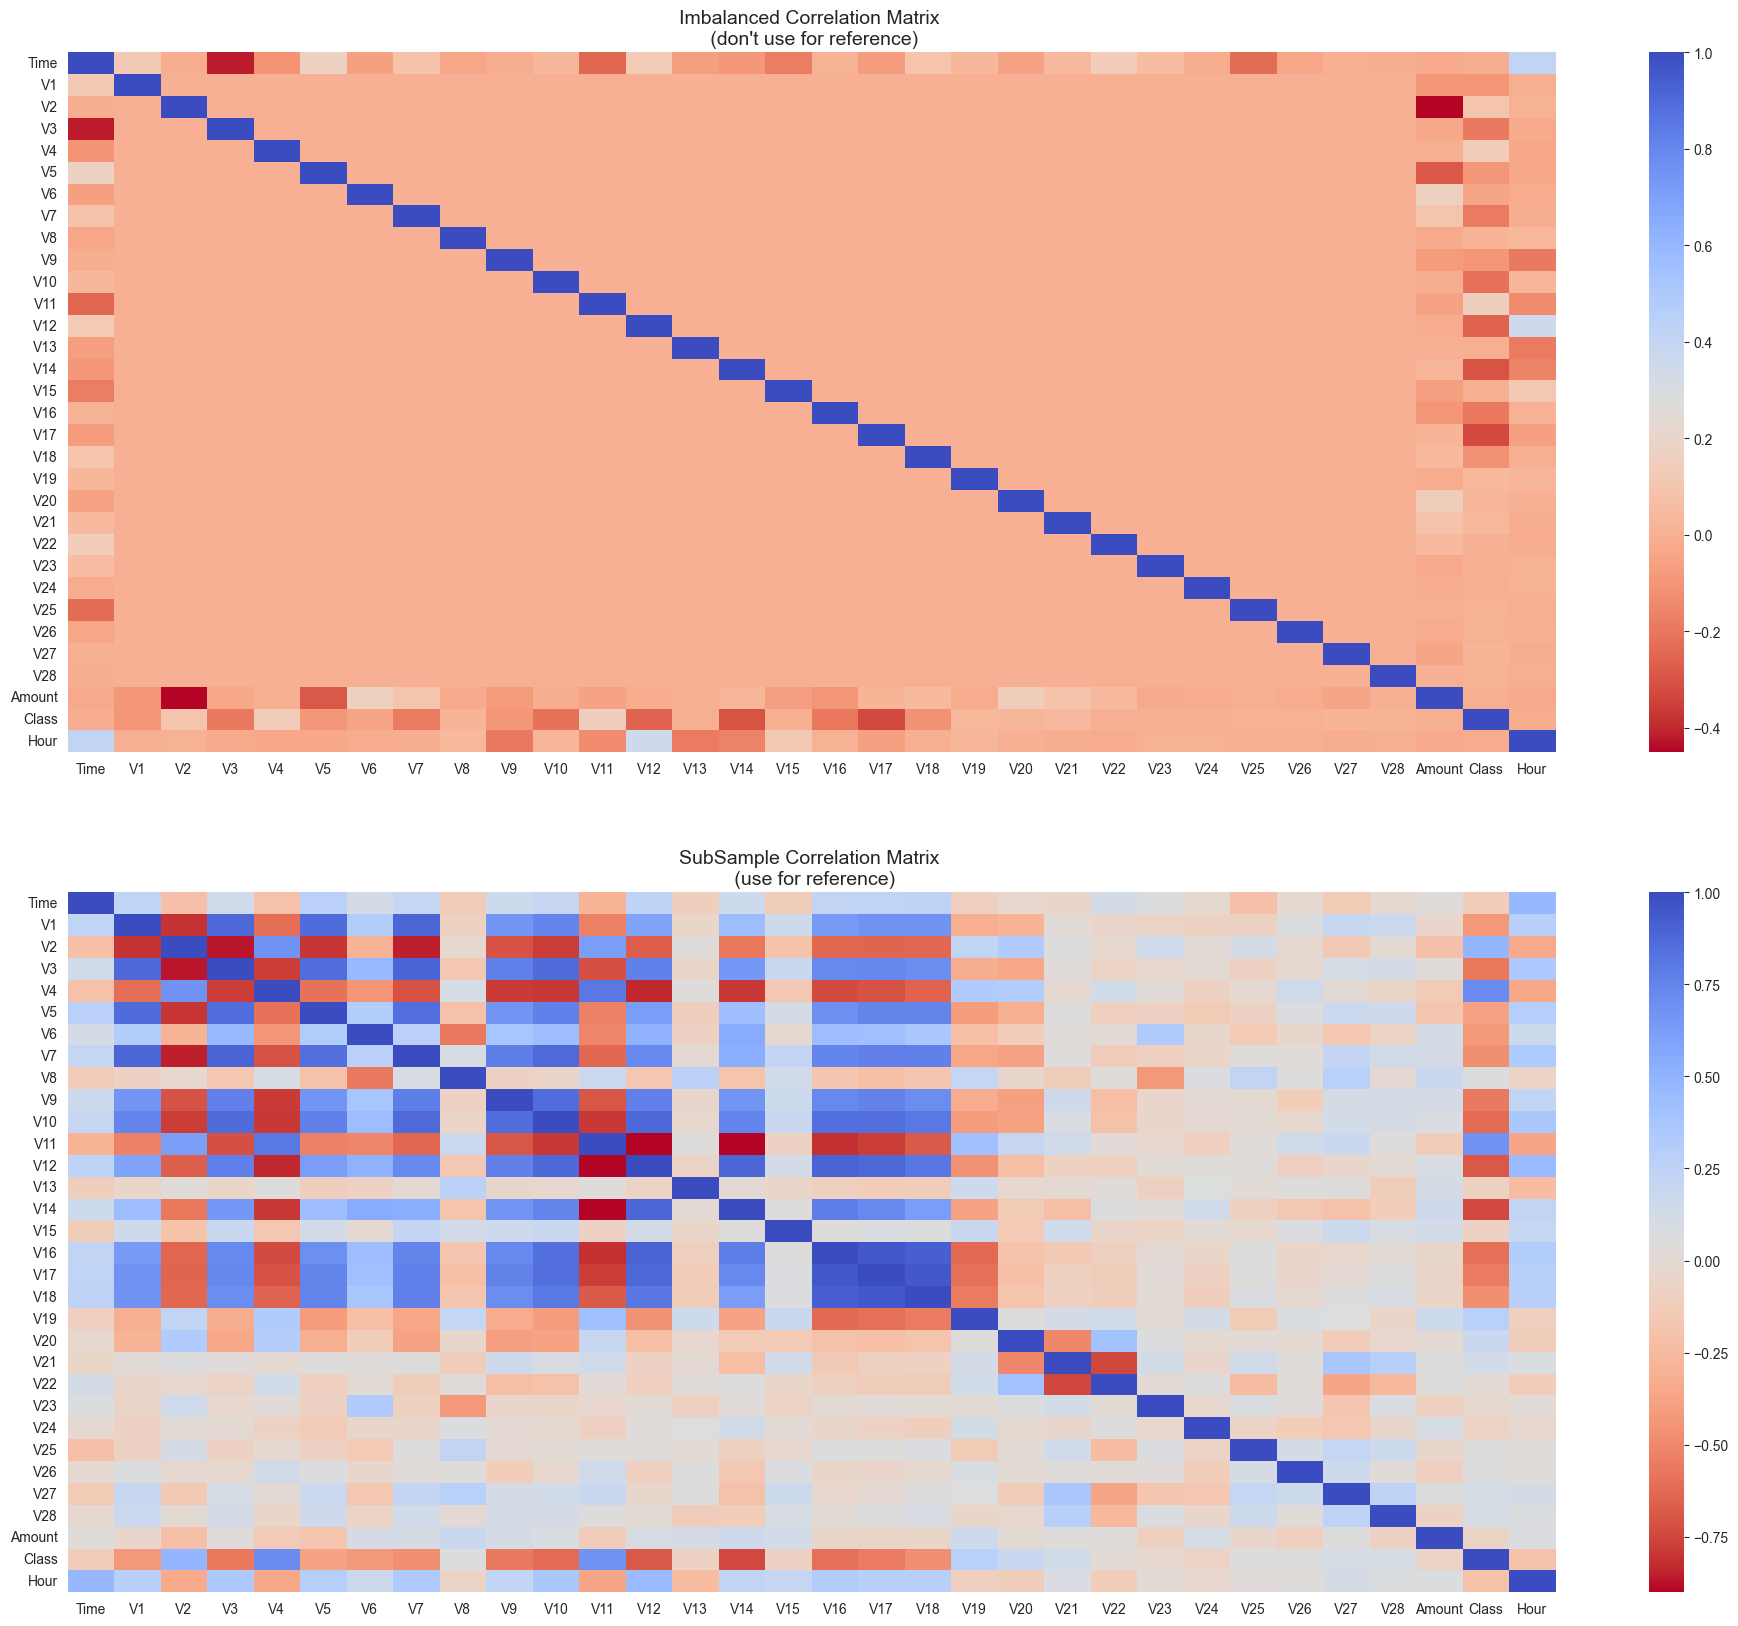

In [160]:
# Make sure we use the subsample in our correlation

f, (ax1, ax2) = plt.subplots(2, 1, figsize=(24,20))

# Entire DataFrame
corr = df.corr()
sns.heatmap(corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax1)
ax1.set_title("Imbalanced Correlation Matrix \n (don't use for reference)", fontsize=14)


sub_sample_corr = new_df.corr()
sns.heatmap(sub_sample_corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax2)
ax2.set_title('SubSample Correlation Matrix \n (use for reference)', fontsize=14)
plt.show()

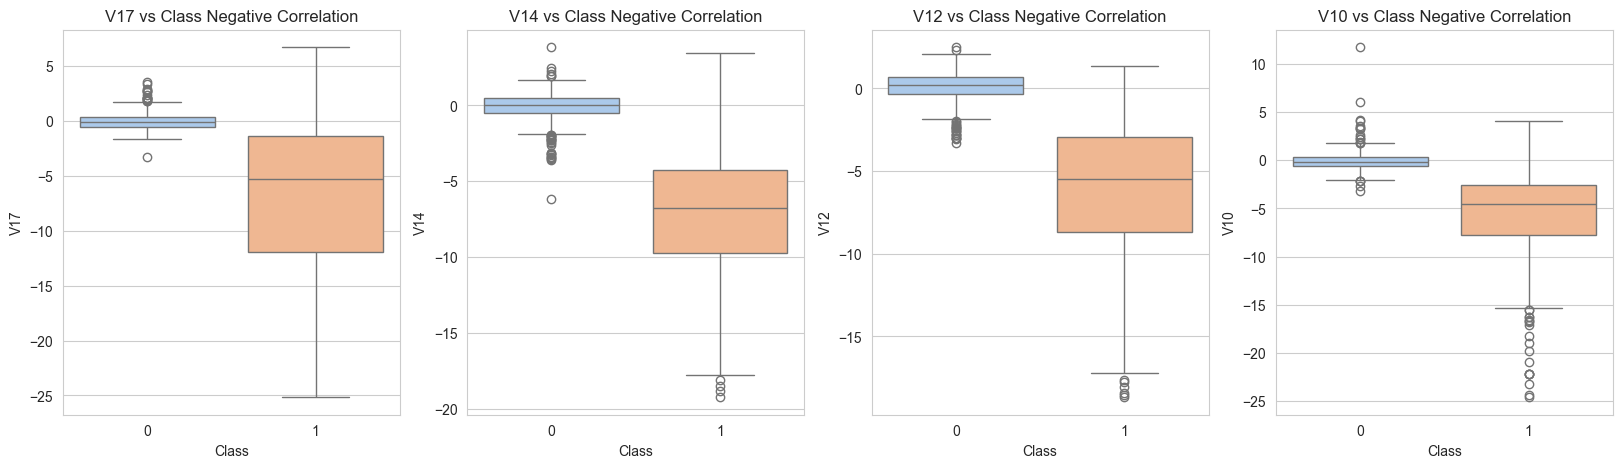

In [161]:
f, axis = plt.subplots(ncols=4, figsize=(20, 5))

# negative correlation with our Class
sns.boxplot(x="Class", y="V17", data=new_df, ax=axis[0], palette="pastel")
axis[0].set_title('V17 vs Class Negative Correlation')

sns.boxplot(x="Class", y="V14", data=new_df, ax=axis[1], palette="pastel")
axis[1].set_title('V14 vs Class Negative Correlation')

sns.boxplot(x="Class", y="V12", data=new_df, ax=axis[2], palette="pastel")
axis[2].set_title('V12 vs Class Negative Correlation')

sns.boxplot(x="Class", y="V10", data=new_df, ax=axis[3], palette="pastel")
axis[3].set_title('V10 vs Class Negative Correlation')

plt.show()

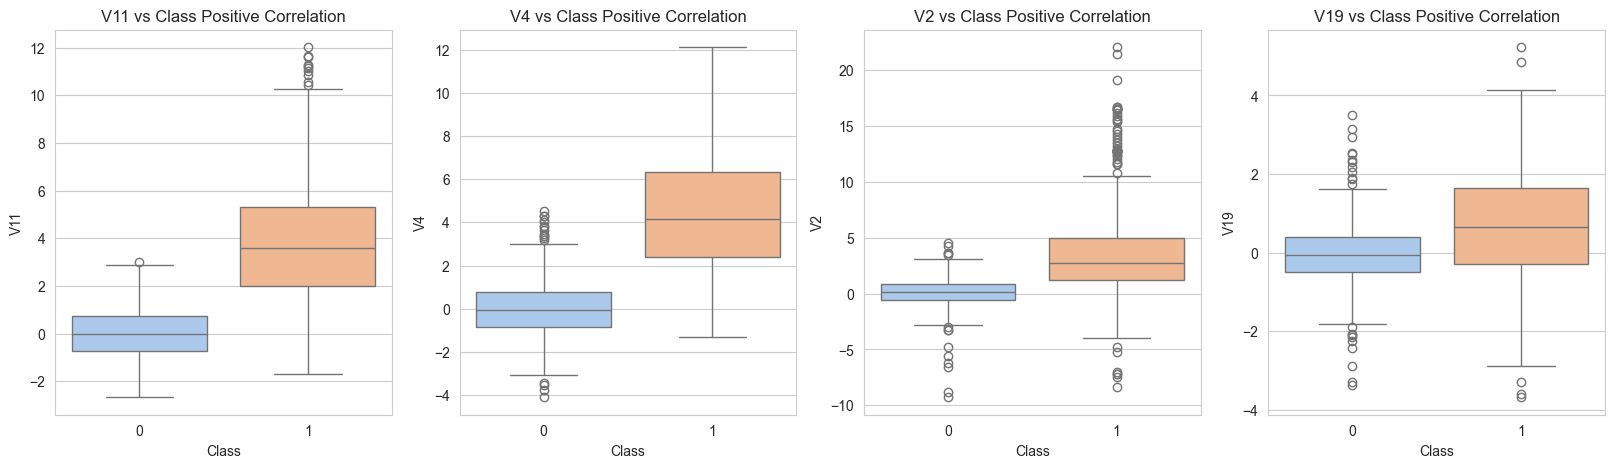

In [162]:
f, axis = plt.subplots(ncols=4, figsize=(20, 5))

# positive correlation with our Class
sns.boxplot(x="Class", y="V11", data=new_df, ax=axis[0], palette="pastel")
axis[0].set_title('V11 vs Class Positive Correlation')

sns.boxplot(x="Class", y="V4", data=new_df, ax=axis[1], palette="pastel")
axis[1].set_title('V4 vs Class Positive Correlation')

sns.boxplot(x="Class", y="V2", data=new_df, ax=axis[2], palette="pastel")
axis[2].set_title('V2 vs Class Positive Correlation')

sns.boxplot(x="Class", y="V19", data=new_df, ax=axis[3], palette="pastel")
axis[3].set_title('V19 vs Class Positive Correlation')

plt.show()

### Anomaly Detection

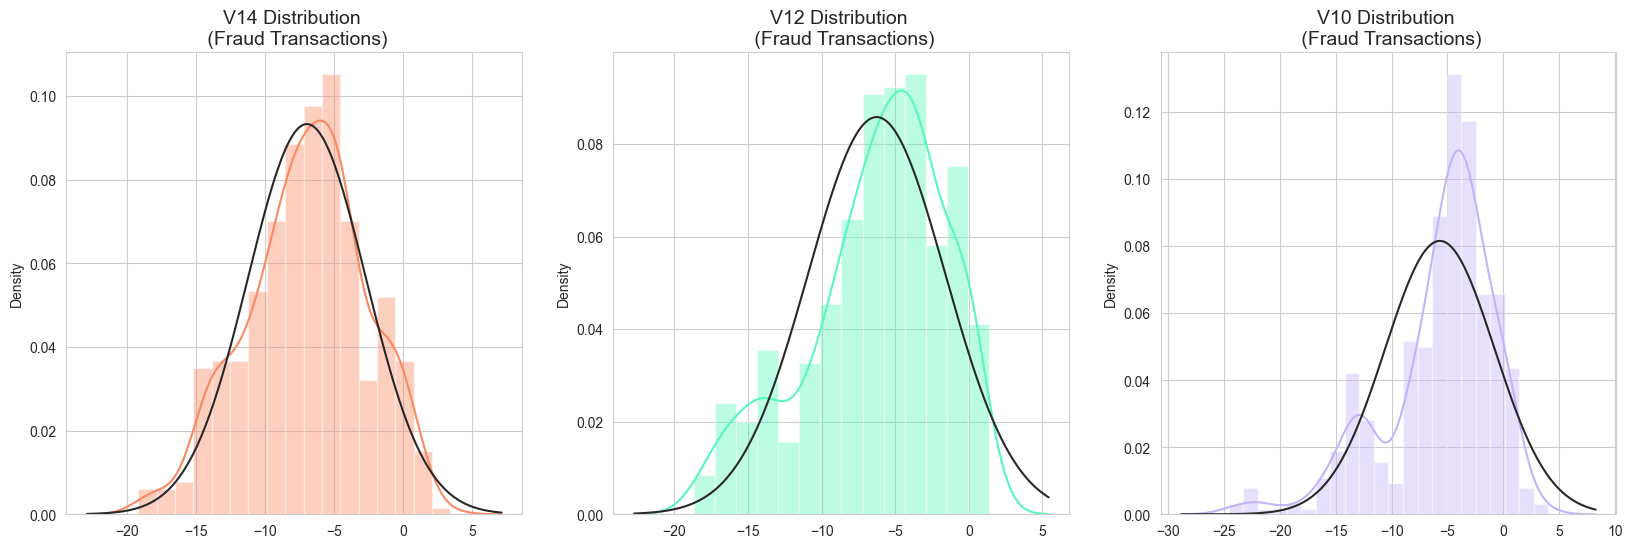

In [163]:
from scipy.stats import norm

f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 6))

v_14_fraud_dist = new_df['V14'].loc[new_df['Class'] == 1].values
sns.distplot(v_14_fraud_dist, ax=ax1, fit=norm, color='#FB8861')
ax1.set_title('V14 Distribution \n (Fraud Transactions)', fontsize=14)

v_12_fraud_dist = new_df['V12'].loc[new_df['Class'] == 1].values
sns.distplot(v_12_fraud_dist, ax=ax2, fit=norm, color='#56F9BB')
ax2.set_title('V12 Distribution \n (Fraud Transactions)', fontsize=14)


v_10_fraud_dist = new_df['V10'].loc[new_df['Class'] == 1].values
sns.distplot(v_10_fraud_dist, ax=ax3, fit=norm, color='#C5B3F9')
ax3.set_title('V10 Distribution \n (Fraud Transactions)', fontsize=14)

plt.show()

In [164]:
# V14 Removing Outliers 

v14_fraud = new_df['V14'].loc[new_df['Class'] == 1].values
q25, q75 = np.percentile(v14_fraud, 25), np.percentile(v14_fraud, 75)

print('Quartile 25: {} | Quartile 75: {}'.format(q25, q75))

Quartile 25: -9.692722964972386 | Quartile 75: -4.282820849486865


In [165]:
v14_iqr = q75 - q25
print('iqr: {}'.format(v14_iqr))

iqr: 5.409902115485521


In [166]:
v14_cut_off = v14_iqr * 1.5
v14_lower, v14_upper = q25 - v14_cut_off, q75 + v14_cut_off

print('Cut Off: {}'.format(v14_cut_off))
print('V14 Lower: {}'.format(v14_lower))
print('V14 Upper: {}'.format(v14_upper))

Cut Off: 8.114853173228282
V14 Lower: -17.807576138200666
V14 Upper: 3.8320323237414167


In [167]:
outliers = [x for x in v14_fraud if x < v14_lower or x > v14_upper]
print("Feature V14 outliers for Fraud Cases: {}".format(len(outliers)))
print("V10 outliers {}".format(outliers[:5]))

Feature V14 outliers for Fraud Cases: 4
V10 outliers [-19.2143254902614, -18.8220867423816, -18.0499976898594, -18.4937733551053]


In [168]:
new_df = new_df.drop(new_df[(new_df['V14'] > v14_upper) | (new_df['V14'] < v14_lower)].index)

In [169]:
# V12 removing outliers from fraud transactions

v12_fraud = new_df['V12'].loc[new_df['Class'] == 1].values
q25, q75 = np.percentile(v12_fraud, 25), np.percentile(v12_fraud, 75)
v12_iqr = q75 - q25
print('iqr: {}'.format(v12_iqr))

v12_cut_off = v12_iqr * 1.5
v12_lower, v12_upper = q25 - v12_cut_off, q75 + v12_cut_off
print('Cut Off: {}'.format(v12_cut_off))
print("V12 Lower: {}".format(v12_lower))
print("V12 Upper: {}".format(v12_upper))

outliers = [x for x in v12_fraud if x < v12_lower or x > v12_upper]
print("Feature V12 outliers for Fraud Cases: {}".format(len(outliers)))
print("V12 outliers: {}".format(outliers))

new_df = new_df.drop(new_df[(new_df['V12'] > v12_upper) | (new_df['V12'] < v12_lower)].index)
print('Number of Instances after outliers removal: {}'.format(len(new_df)))

iqr: 5.780002635714835
Cut Off: 8.670003953572252
V12 Lower: -17.3430371579634
V12 Upper: 5.776973384895937
Feature V12 outliers for Fraud Cases: 4
V12 outliers: [-18.6837146333443, -18.5536970096458, -18.4311310279993, -18.0475965708216]
Number of Instances after outliers removal: 976


In [170]:
# Removing outliers V10 Feature
v10_fraud = new_df['V10'].loc[new_df['Class'] == 1].values
q25, q75 = np.percentile(v10_fraud, 25), np.percentile(v10_fraud, 75)
v10_iqr = q75 - q25

v10_cut_off = v10_iqr * 1.5
v10_lower, v10_upper = q25 - v10_cut_off, q75 + v10_cut_off
print('V10 Lower: {}'.format(v10_lower))
print('V10 Upper: {}'.format(v10_upper))

outliers = [x for x in v10_fraud if x < v10_lower or x > v10_upper]
print('V10 outliers: {}'.format(outliers))
print('Feature V10 Outliers for Fraud Cases: {}'.format(len(outliers)))

new_df = new_df.drop(new_df[(new_df['V10'] > v10_upper) | (new_df['V10'] < v10_lower)].index)
print('Number of Instances after outliers removal: {}'.format(len(new_df)))

V10 Lower: -14.89885463232024
V10 Upper: 4.92033495834214
V10 outliers: [-23.2282548357516, -18.9132433348732, -22.1870885620007, -14.9246547735487, -15.2399619587112, -17.1415136412892, -15.2399619587112, -15.5637913387301, -22.1870885620007, -15.3460988468775, -15.5637913387301, -16.2556117491401, -16.6496281595399, -19.836148851696, -15.1241628144947, -16.7460441053944, -14.9246547735487, -15.1237521803455, -22.1870885620007, -24.4031849699728, -24.5882624372475, -22.1870885620007, -18.2711681738888, -16.6011969664137, -20.9491915543611, -16.3035376590131, -15.2318333653018]
Feature V10 Outliers for Fraud Cases: 27
Number of Instances after outliers removal: 947


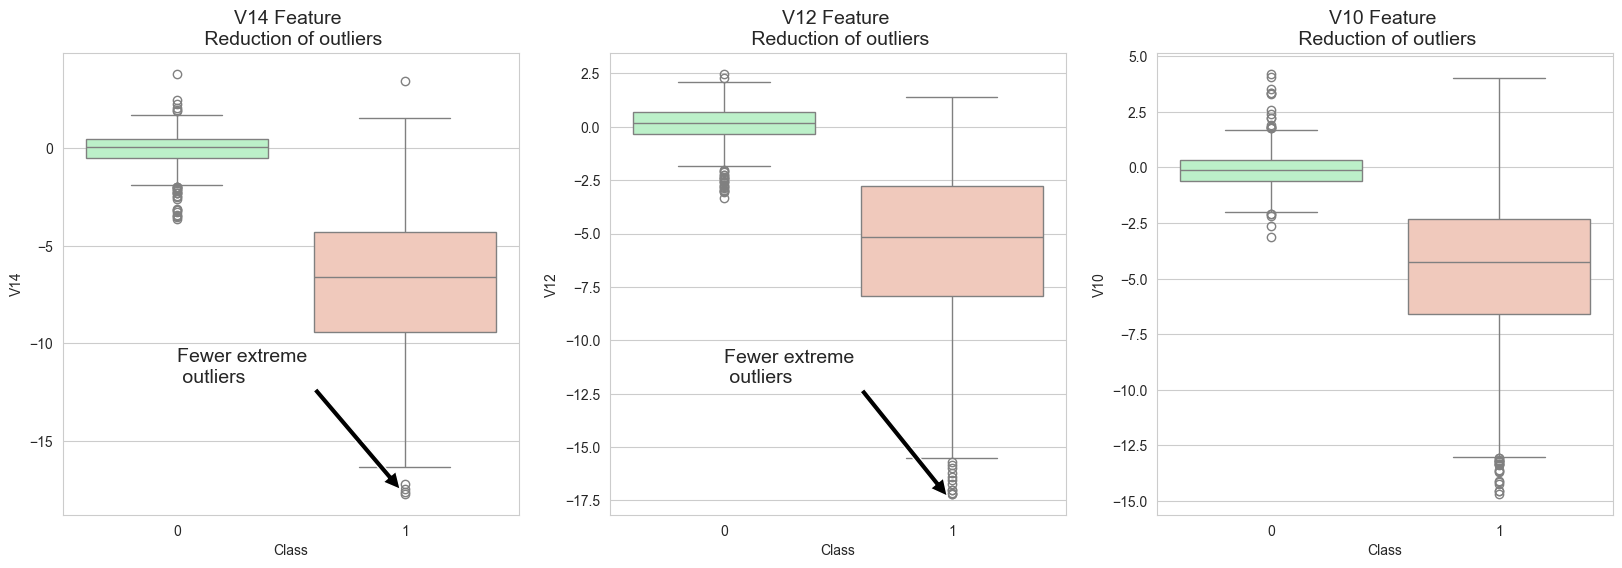

In [171]:
f,(ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,6))

colors = ['#B3F9C5', '#f9c5b3']
# Boxplots with outliers removed
# Feature V14
sns.boxplot(x="Class", y="V14", data=new_df,ax=ax1, palette=colors)
ax1.set_title("V14 Feature \n Reduction of outliers", fontsize=14)
ax1.annotate('Fewer extreme \n outliers', xy=(0.98, -17.5), xytext=(0, -12),
            arrowprops=dict(facecolor='black'),
            fontsize=14)

# Feature 12
sns.boxplot(x="Class", y="V12", data=new_df, ax=ax2, palette=colors)
ax2.set_title("V12 Feature \n Reduction of outliers", fontsize=14)
ax2.annotate('Fewer extreme \n outliers', xy=(0.98, -17.3), xytext=(0, -12),
            arrowprops=dict(facecolor='black'),
            fontsize=14)

# Feature V10
sns.boxplot(x="Class", y="V10", data=new_df, ax=ax3, palette=colors)
ax3.set_title("V10 Feature \n Reduction of outliers", fontsize=14)
ax3.annotate('Fewer extreme \n outliers', xy=(0.95, -16.5), xytext=(0, -12),
            arrowprops=dict(facecolor='black'),
            fontsize=14)


plt.show()

### Dimensionality Reduction and Clustering (t-SNE)

In [172]:
# new_df from the random undersample data 
from sklearn.manifold import TSNE

# splitting the data into features and target
X = new_df.drop('Class', axis=1)
y = new_df['Class']

# T-SNE implementation
t0 = time.time()
X_reduced_tsne = TSNE(n_components=2, random_state=42).fit_transform(X.values)
t1 = time.time()
print("T-SNE took {:.2} s".format(t1 - t0))

T-SNE took 4.0 s


In [173]:
# PCA Implementation
t0 = time.time()
X_reduced_pca = PCA(n_components=2, random_state=42).fit_transform(X.values)
t1 = time.time()
print("PCA took {:.2} s".format(t1 - t0))

PCA took 0.0035 s


In [174]:
from sklearn.decomposition import PCA, TruncatedSVD

# TrancuatedSVD
t0 = time.time()
X_reduced_svd = TruncatedSVD(n_components=2, random_state=42).fit_transform(X.values)
t1 = time.time()
print("Truncated SVD took {:.2} s".format(t1 - t0))

Truncated SVD took 0.0075 s


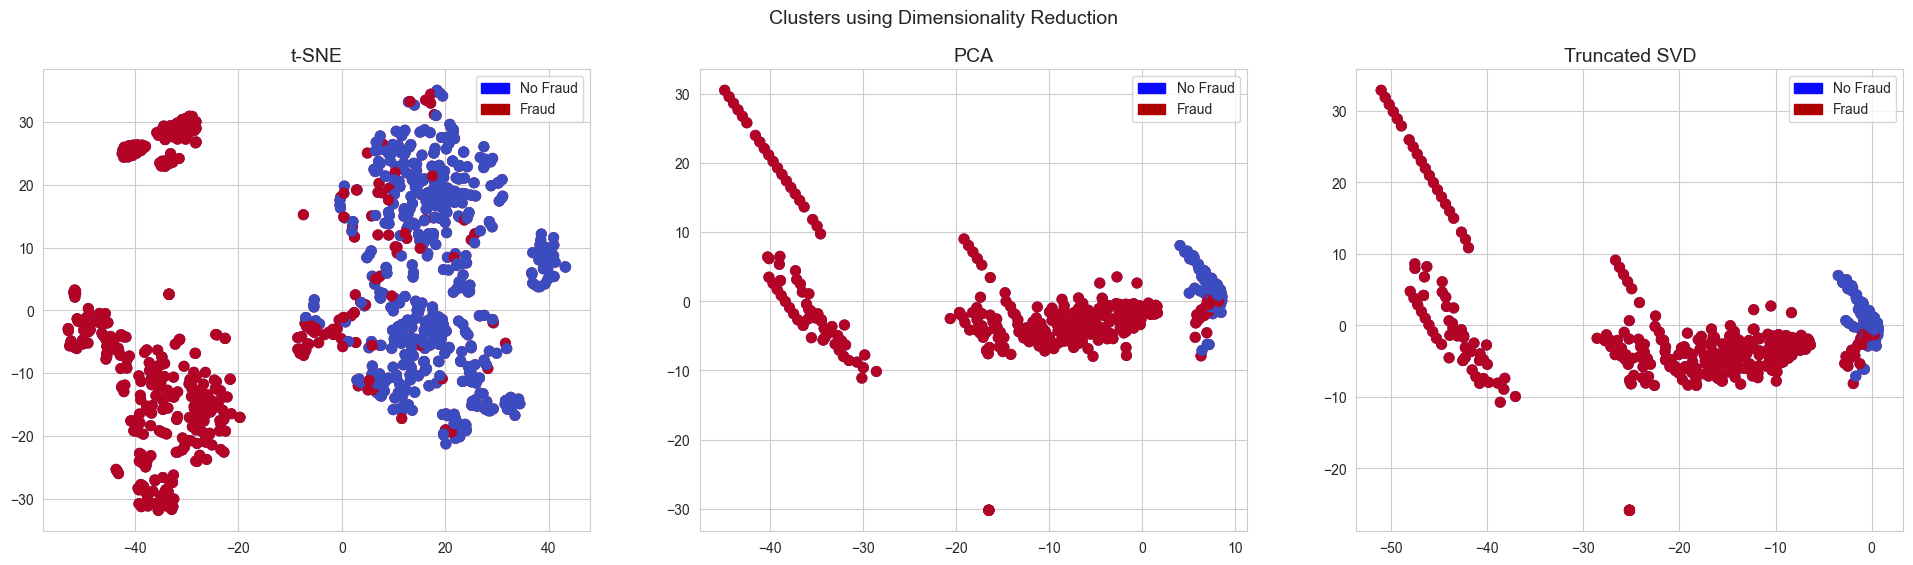

In [175]:
import matplotlib.patches as mpatches

f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24,6))
# labels = ['No Fraud', 'Fraud']
f.suptitle('Clusters using Dimensionality Reduction', fontsize=14)


blue_patch = mpatches.Patch(color='#0A0AFF', label='No Fraud')
red_patch = mpatches.Patch(color='#AF0000', label='Fraud')

# t-SNE scatter plot
ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax1.set_title('t-SNE', fontsize=14)

ax1.grid(True)

ax1.legend(handles=[blue_patch, red_patch])

# PCA scatter plot
ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax2.set_title('PCA', fontsize=14)

ax2.grid(True)

ax2.legend(handles=[blue_patch, red_patch])

# TruncatedSVD scatter plot
ax3.scatter(X_reduced_svd[:,0], X_reduced_svd[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax3.scatter(X_reduced_svd[:,0], X_reduced_svd[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax3.set_title('Truncated SVD', fontsize=14)

ax3.grid(True)

ax3.legend(handles=[blue_patch, red_patch])

plt.show()

### Classifiers

In [176]:
# Undersampling before cross validating (prone to overfit)
X = new_df.drop('Class', axis=1)
y = new_df['Class']

In [177]:
# Our data is already scaled we should split our training and test sets
from sklearn.model_selection import train_test_split

# This is explicitly used for undersampling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [178]:
# Turn the values into an array for feeding the classification algorithms.
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

In [179]:
# Let's implement simple classifiers

classifiers = {
    "LogisiticRegression": LogisticRegression(),
    "KNearest": KNeighborsClassifier(),
    "Support Vector Classifier": SVC(),
    "DecisionTreeClassifier": DecisionTreeClassifier()
}

In [180]:
%%time
# Wow our scores are getting even high scores even when applying cross validation.
from sklearn.model_selection import cross_val_score


for key, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    training_score = cross_val_score(classifier, X_train, y_train, cv=5)
    print("Classifiers: ", classifier.__class__.__name__, "Has a training score of", round(training_score.mean(), 2) * 100, "% accuracy score")

Classifiers:  LogisticRegression Has a training score of 94.0 % accuracy score
Classifiers:  KNeighborsClassifier Has a training score of 93.0 % accuracy score
Classifiers:  SVC Has a training score of 94.0 % accuracy score
Classifiers:  DecisionTreeClassifier Has a training score of 88.0 % accuracy score
CPU times: total: 1.02 s
Wall time: 415 ms


In [181]:
%%time
# Use GridSearchCV to find the best parameters.
from sklearn.model_selection import GridSearchCV


# Logistic Regression 
log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}



grid_log_reg = GridSearchCV(LogisticRegression(), log_reg_params)
grid_log_reg.fit(X_train, y_train)
# We automatically get the logistic regression with the best parameters.
log_reg = grid_log_reg.best_estimator_

knears_params = {"n_neighbors": list(range(2,5,1)), 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}

grid_knears = GridSearchCV(KNeighborsClassifier(), knears_params)
grid_knears.fit(X_train, y_train)
# KNears best estimator
knears_neighbors = grid_knears.best_estimator_

# Support Vector Classifier
svc_params = {'C': [0.5, 0.7, 0.9, 1], 'kernel': ['rbf', 'poly', 'sigmoid', 'linear']}
grid_svc = GridSearchCV(SVC(), svc_params)
grid_svc.fit(X_train, y_train)

# SVC best estimator
svc = grid_svc.best_estimator_

# DecisionTree Classifier
tree_params = {"criterion": ["gini", "entropy"], "max_depth": list(range(2,4,1)), 
              "min_samples_leaf": list(range(5,7,1))}
grid_tree = GridSearchCV(DecisionTreeClassifier(), tree_params)
grid_tree.fit(X_train, y_train)

# tree best estimator
tree_clf = grid_tree.best_estimator_

CPU times: total: 4.73 s
Wall time: 2.8 s


In [182]:
# Overfitting Case

log_reg_score = cross_val_score(log_reg, X_train, y_train, cv=5)
print('Logistic Regression Cross Validation Score: ', round(log_reg_score.mean() * 100, 2).astype(str) + '%')


knears_score = cross_val_score(knears_neighbors, X_train, y_train, cv=5)
print('Knears Neighbors Cross Validation Score', round(knears_score.mean() * 100, 2).astype(str) + '%')

svc_score = cross_val_score(svc, X_train, y_train, cv=5)
print('Support Vector Classifier Cross Validation Score', round(svc_score.mean() * 100, 2).astype(str) + '%')

tree_score = cross_val_score(tree_clf, X_train, y_train, cv=5)
print('DecisionTree Classifier Cross Validation Score', round(tree_score.mean() * 100, 2).astype(str) + '%')

Logistic Regression Cross Validation Score:  93.79%
Knears Neighbors Cross Validation Score 93.66%
Support Vector Classifier Cross Validation Score 93.53%
DecisionTree Classifier Cross Validation Score 91.15%


In [183]:
# We will undersample during cross validating
undersample_X = df.drop('Class', axis=1)
undersample_y = df['Class']

for train_index, test_index in sss.split(undersample_X, undersample_y):
    print("Train:", train_index, "Test:", test_index)
    undersample_Xtrain, undersample_Xtest = undersample_X.iloc[train_index], undersample_X.iloc[test_index]
    undersample_ytrain, undersample_ytest = undersample_y.iloc[train_index], undersample_y.iloc[test_index]
    
undersample_Xtrain = undersample_Xtrain.values
undersample_Xtest = undersample_Xtest.values
undersample_ytrain = undersample_ytrain.values
undersample_ytest = undersample_ytest.values 

undersample_accuracy = []
undersample_precision = []
undersample_recall = []
undersample_f1 = []
undersample_auc = []

# Implementing NearMiss Technique 
# Distribution of NearMiss (Just to see how it distributes the labels we won't use these variables)
X_nearmiss, y_nearmiss = NearMiss().fit_resample(undersample_X.values, undersample_y.values)
print('NearMiss Label Distribution: {}'.format(Counter(y_nearmiss)))
# Cross Validating the right way

for train, test in sss.split(undersample_Xtrain, undersample_ytrain):
    undersample_pipeline = imbalanced_make_pipeline(NearMiss(sampling_strategy='majority'), log_reg) # SMOTE happens during Cross Validation not before..
    undersample_model = undersample_pipeline.fit(undersample_Xtrain[train], undersample_ytrain[train])
    undersample_prediction = undersample_model.predict(undersample_Xtrain[test])
    
    undersample_accuracy.append(undersample_pipeline.score(original_Xtrain[test], original_ytrain[test]))
    undersample_precision.append(precision_score(original_ytrain[test], undersample_prediction))
    undersample_recall.append(recall_score(original_ytrain[test], undersample_prediction))
    undersample_f1.append(f1_score(original_ytrain[test], undersample_prediction))
    undersample_auc.append(roc_auc_score(original_ytrain[test], undersample_prediction))

Train: [ 53046  55091  55481 ... 284804 284805 284806] Test: [    0     1     2 ... 56963 56964 56965]
Train: [     0      1      2 ... 284804 284805 284806] Test: [ 53046  55091  55481 ... 113929 113930 113931]
Train: [     0      1      2 ... 284804 284805 284806] Test: [109880 110206 110447 ... 170882 170883 171229]
Train: [     0      1      2 ... 284804 284805 284806] Test: [170884 170885 170886 ... 227845 227846 227847]
Train: [     0      1      2 ... 227845 227846 227847] Test: [225279 227222 227848 ... 284804 284805 284806]
NearMiss Label Distribution: Counter({0: 492, 1: 492})


In [184]:
# Let's Plot LogisticRegression Learning Curve
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator1, estimator2, estimator3, estimator4, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(20,14), sharey=True)
    if ylim is not None:
        plt.ylim(*ylim)
    # First Estimator
    train_sizes, train_scores, test_scores = learning_curve(
        estimator1, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax1.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    ax1.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax1.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Training score")
    ax1.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax1.set_title("Logistic Regression Learning Curve", fontsize=14)
    ax1.set_xlabel('Training size (m)')
    ax1.set_ylabel('Score')
    ax1.grid(True)
    ax1.legend(loc="best")
    
    # Second Estimator 
    train_sizes, train_scores, test_scores = learning_curve(
        estimator2, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax2.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    ax2.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax2.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Training score")
    ax2.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax2.set_title("Knears Neighbors Learning Curve", fontsize=14)
    ax2.set_xlabel('Training size (m)')
    ax2.set_ylabel('Score')
    ax2.grid(True)
    ax2.legend(loc="best")
    
    # Third Estimator
    train_sizes, train_scores, test_scores = learning_curve(
        estimator3, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax3.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    ax3.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax3.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Training score")
    ax3.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax3.set_title("Support Vector Classifier \n Learning Curve", fontsize=14)
    ax3.set_xlabel('Training size (m)')
    ax3.set_ylabel('Score')
    ax3.grid(True)
    ax3.legend(loc="best")
    
    # Fourth Estimator
    train_sizes, train_scores, test_scores = learning_curve(
        estimator4, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax4.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    ax4.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax4.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Training score")
    ax4.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax4.set_title("Decision Tree Classifier \n Learning Curve", fontsize=14)
    ax4.set_xlabel('Training size (m)')
    ax4.set_ylabel('Score')
    ax4.grid(True)
    ax4.legend(loc="best")
    return plt

<module 'matplotlib.pyplot' from 'c:\\Users\\muham\\anaconda3\\envs\\python_tf\\Lib\\site-packages\\matplotlib\\pyplot.py'>

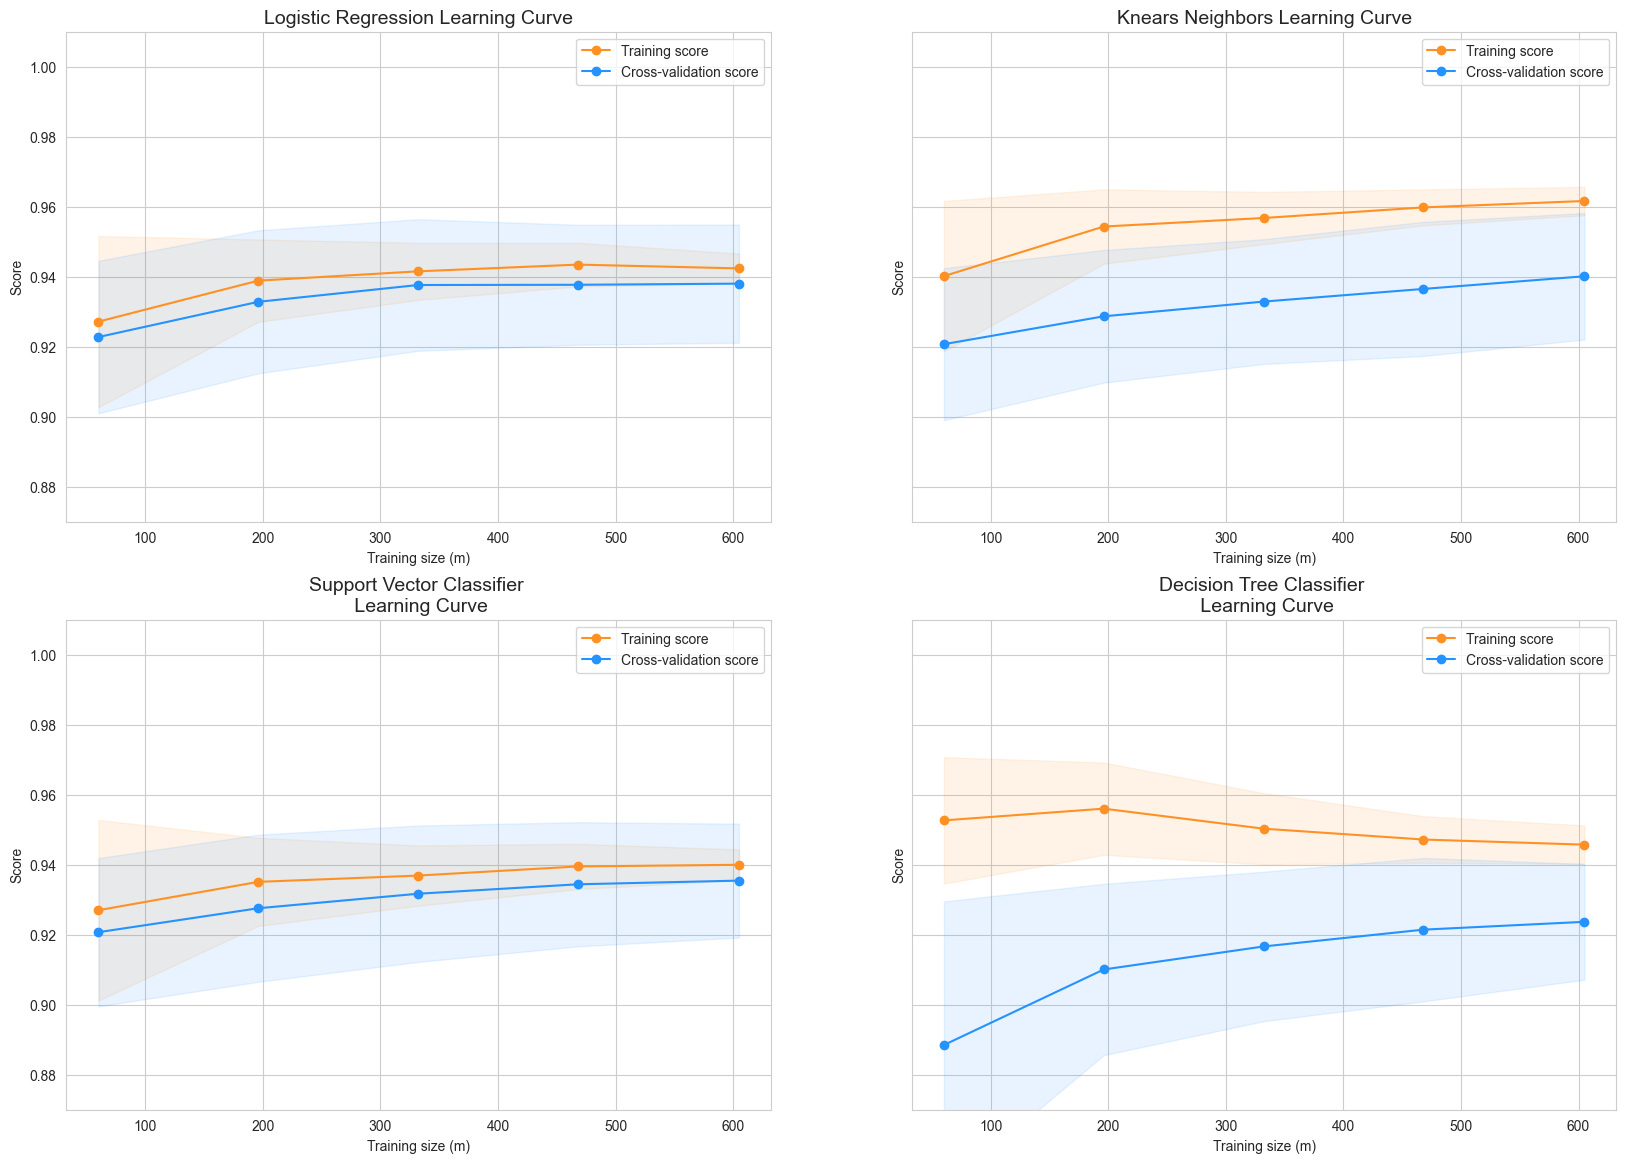

In [185]:
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=42)
plot_learning_curve(log_reg, knears_neighbors, svc, tree_clf, X_train, y_train, (0.87, 1.01), cv=cv, n_jobs=4)

In [186]:
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_predict
# Create a DataFrame with all the scores and the classifiers names.

log_reg_pred = cross_val_predict(log_reg, X_train, y_train, cv=5,
                             method="decision_function")

knears_pred = cross_val_predict(knears_neighbors, X_train, y_train, cv=5)

svc_pred = cross_val_predict(svc, X_train, y_train, cv=5,
                             method="decision_function")

tree_pred = cross_val_predict(tree_clf, X_train, y_train, cv=5)

In [187]:
from sklearn.metrics import roc_auc_score

print('Logistic Regression: ', roc_auc_score(y_train, log_reg_pred))
print('KNears Neighbors: ', roc_auc_score(y_train, knears_pred))
print('Support Vector Classifier: ', roc_auc_score(y_train, svc_pred))
print('Decision Tree Classifier: ', roc_auc_score(y_train, tree_pred))

Logistic Regression:  0.9784177703034126
KNears Neighbors:  0.9332177142456731
Support Vector Classifier:  0.9776189475159416
Decision Tree Classifier:  0.9114147571999158


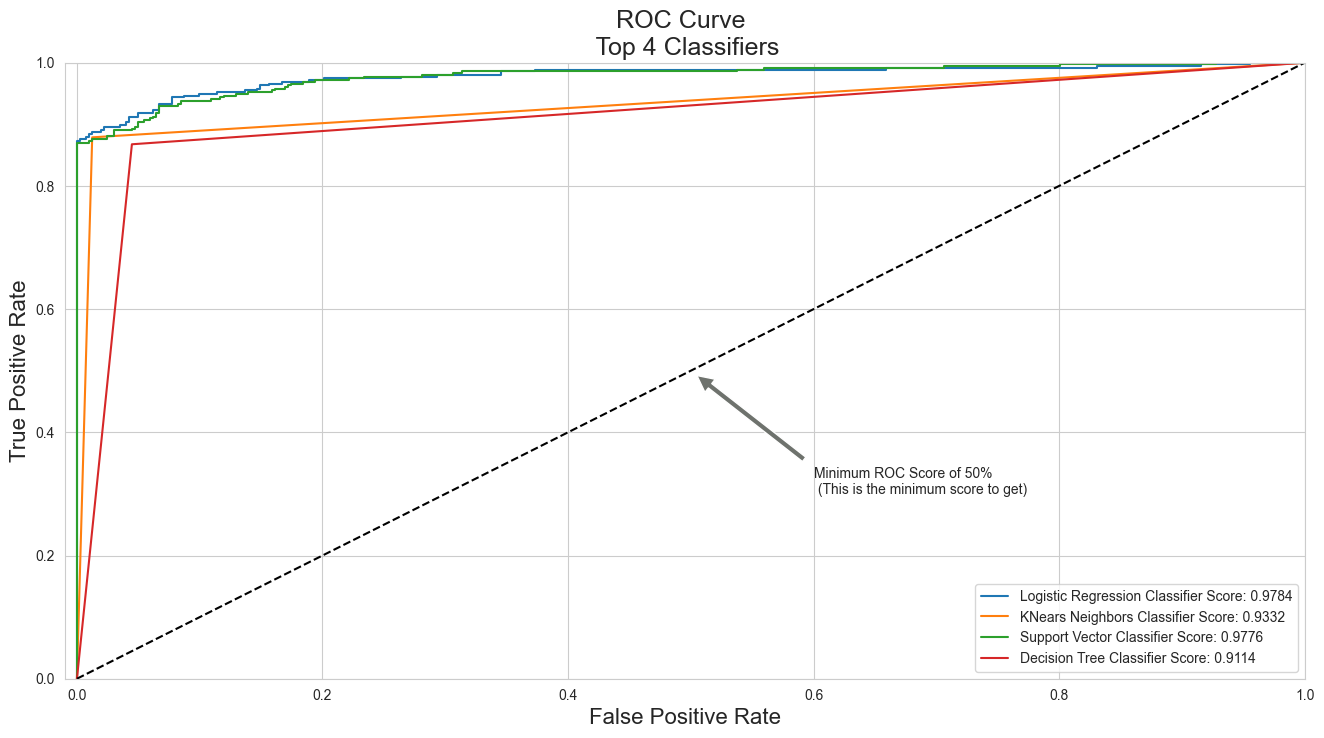

In [188]:
log_fpr, log_tpr, log_thresold = roc_curve(y_train, log_reg_pred)
knear_fpr, knear_tpr, knear_threshold = roc_curve(y_train, knears_pred)
svc_fpr, svc_tpr, svc_threshold = roc_curve(y_train, svc_pred)
tree_fpr, tree_tpr, tree_threshold = roc_curve(y_train, tree_pred)


def graph_roc_curve_multiple(log_fpr, log_tpr, knear_fpr, knear_tpr, svc_fpr, svc_tpr, tree_fpr, tree_tpr):
    plt.figure(figsize=(16,8))
    plt.title('ROC Curve \n Top 4 Classifiers', fontsize=18)
    plt.plot(log_fpr, log_tpr, label='Logistic Regression Classifier Score: {:.4f}'.format(roc_auc_score(y_train, log_reg_pred)))
    plt.plot(knear_fpr, knear_tpr, label='KNears Neighbors Classifier Score: {:.4f}'.format(roc_auc_score(y_train, knears_pred)))
    plt.plot(svc_fpr, svc_tpr, label='Support Vector Classifier Score: {:.4f}'.format(roc_auc_score(y_train, svc_pred)))
    plt.plot(tree_fpr, tree_tpr, label='Decision Tree Classifier Score: {:.4f}'.format(roc_auc_score(y_train, tree_pred)))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.01, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.annotate('Minimum ROC Score of 50% \n (This is the minimum score to get)', xy=(0.5, 0.5), xytext=(0.6, 0.3),
                arrowprops=dict(facecolor='#6E726D', shrink=0.05),
                )
    plt.legend()
    
graph_roc_curve_multiple(log_fpr, log_tpr, knear_fpr, knear_tpr, svc_fpr, svc_tpr, tree_fpr, tree_tpr)
plt.show()

### Logistic regression

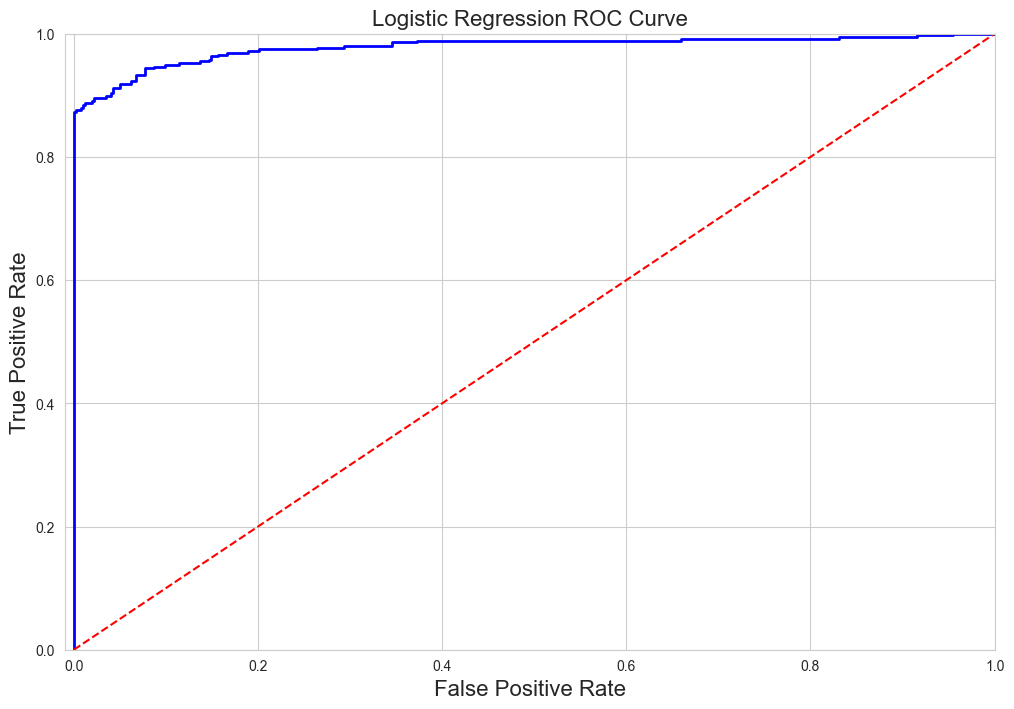

In [189]:
def logistic_roc_curve(log_fpr, log_tpr):
    plt.figure(figsize=(12,8))
    plt.title('Logistic Regression ROC Curve', fontsize=16)
    plt.plot(log_fpr, log_tpr, 'b-', linewidth=2)
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.axis([-0.01,1,0,1])
    
    
logistic_roc_curve(log_fpr, log_tpr)
plt.show()

In [190]:
from sklearn.metrics import precision_recall_curve

precision, recall, threshold = precision_recall_curve(y_train, log_reg_pred)

In [191]:
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score
y_pred = log_reg.predict(X_train)

# Overfitting Case
print('---' * 45)
print('Overfitting: \n')
print('Recall Score: {:.2f}'.format(recall_score(y_train, y_pred)))
print('Precision Score: {:.2f}'.format(precision_score(y_train, y_pred)))
print('F1 Score: {:.2f}'.format(f1_score(y_train, y_pred)))
print('Accuracy Score: {:.2f}'.format(accuracy_score(y_train, y_pred)))
print('---' * 45)

# How it should look like
print('---' * 45)
print('How it should be:\n')
print("Accuracy Score: {:.2f}".format(np.mean(undersample_accuracy)))
print("Precision Score: {:.2f}".format(np.mean(undersample_precision)))
print("Recall Score: {:.2f}".format(np.mean(undersample_recall)))
print("F1 Score: {:.2f}".format(np.mean(undersample_f1)))
print('---' * 45)

---------------------------------------------------------------------------------------------------------------------------------------
Overfitting: 

Recall Score: 0.89
Precision Score: 0.92
F1 Score: 0.91
Accuracy Score: 0.91
---------------------------------------------------------------------------------------------------------------------------------------
---------------------------------------------------------------------------------------------------------------------------------------
How it should be:

Accuracy Score: 0.89
Precision Score: 0.00
Recall Score: 0.09
F1 Score: 0.00
---------------------------------------------------------------------------------------------------------------------------------------


In [192]:
undersample_y_score = log_reg.decision_function(original_Xtest)

In [193]:
from sklearn.metrics import average_precision_score

undersample_average_precision = average_precision_score(original_ytest, undersample_y_score)

print('Average precision-recall score: {0:0.2f}'.format(
      undersample_average_precision))

Average precision-recall score: 0.28


Text(0.5, 1.0, 'UnderSampling Precision-Recall curve: \n Average Precision-Recall Score =0.28')

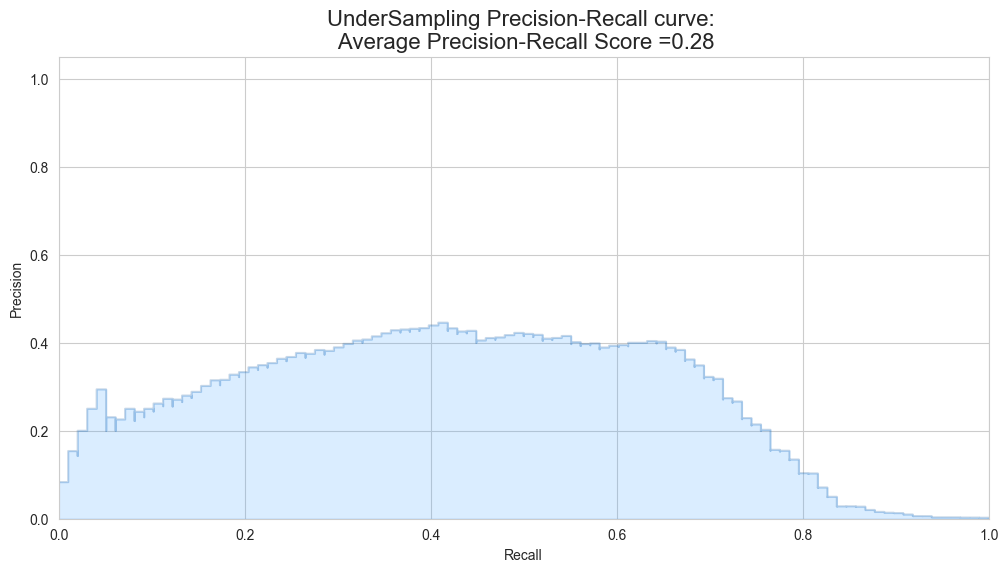

In [194]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12,6))

precision, recall, _ = precision_recall_curve(original_ytest, undersample_y_score)

plt.step(recall, precision, color='#004a93', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='#48a6ff')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('UnderSampling Precision-Recall curve: \n Average Precision-Recall Score ={0:0.2f}'.format(
          undersample_average_precision), fontsize=16)

### SMOTE Technique

In [195]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, RandomizedSearchCV


print('Length of X (train): {} | Length of y (train): {}'.format(len(original_Xtrain), len(original_ytrain)))
print('Length of X (test): {} | Length of y (test): {}'.format(len(original_Xtest), len(original_ytest)))

# List to append the score and then find the average
accuracy_lst = []
precision_lst = []
recall_lst = []
f1_lst = []
auc_lst = []

# Classifier with optimal parameters
# log_reg_sm = grid_log_reg.best_estimator_
log_reg_sm = LogisticRegression()

rand_log_reg = RandomizedSearchCV(LogisticRegression(), log_reg_params, n_iter=4)

# Implementing SMOTE Technique 
# Cross Validating the right way
# Parameters
log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
for train, test in sss.split(original_Xtrain, original_ytrain):
    pipeline = imbalanced_make_pipeline(SMOTE(sampling_strategy='minority'), rand_log_reg) # SMOTE happens during Cross Validation not before..
    model = pipeline.fit(original_Xtrain[train], original_ytrain[train])
    best_est = rand_log_reg.best_estimator_
    prediction = best_est.predict(original_Xtrain[test])
    
    accuracy_lst.append(pipeline.score(original_Xtrain[test], original_ytrain[test]))
    precision_lst.append(precision_score(original_ytrain[test], prediction))
    recall_lst.append(recall_score(original_ytrain[test], prediction))
    f1_lst.append(f1_score(original_ytrain[test], prediction))
    auc_lst.append(roc_auc_score(original_ytrain[test], prediction))
    
print('---' * 45)
print('')
print("accuracy: {}".format(np.mean(accuracy_lst)))
print("precision: {}".format(np.mean(precision_lst)))
print("recall: {}".format(np.mean(recall_lst)))
print("f1: {}".format(np.mean(f1_lst)))
print('---' * 45)

Length of X (train): 227846 | Length of y (train): 227846
Length of X (test): 56961 | Length of y (test): 56961
---------------------------------------------------------------------------------------------------------------------------------------

accuracy: 0.9661702848597651
precision: 0.059600265864916846
recall: 0.9036027263875365
f1: 0.10973520619356192
---------------------------------------------------------------------------------------------------------------------------------------


In [196]:
from sklearn.metrics import classification_report

labels = ['No Fraud', 'Fraud']
smote_prediction = best_est.predict(original_Xtest)
print(classification_report(original_ytest, smote_prediction, target_names=labels))

              precision    recall  f1-score   support

    No Fraud       1.00      0.99      1.00     56863
       Fraud       0.13      0.86      0.23        98

    accuracy                           0.99     56961
   macro avg       0.57      0.92      0.61     56961
weighted avg       1.00      0.99      0.99     56961



In [197]:
y_score = best_est.decision_function(original_Xtest)

In [198]:
average_precision = average_precision_score(original_ytest, y_score)
print('Average precision-recall score: {0:0.2f}'.format(average_precision))

Average precision-recall score: 0.75


Text(0.5, 1.0, 'OverSampling Precision-Recall curve: \n Average Precision-Recall Score =0.75')

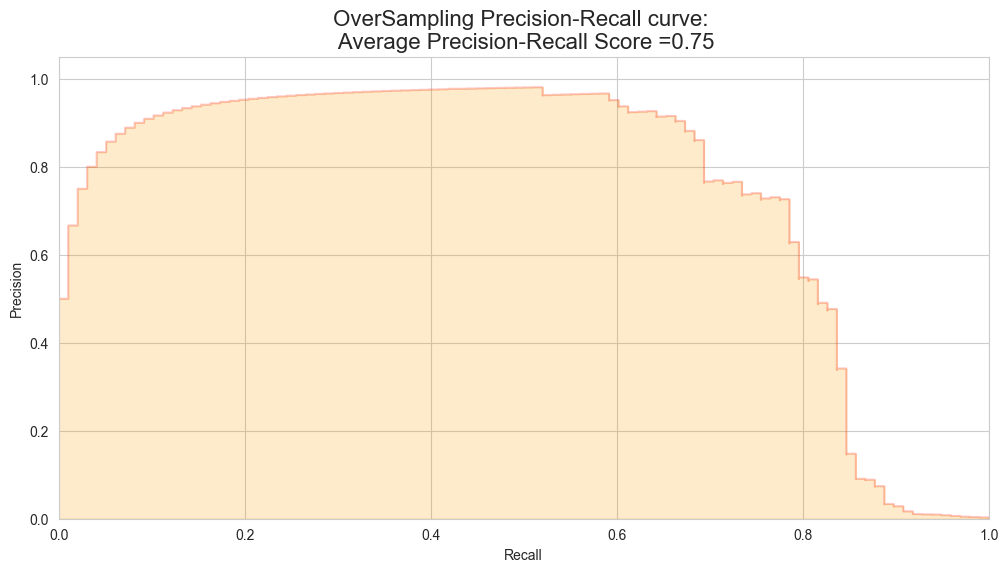

In [199]:
fig = plt.figure(figsize=(12,6))

precision, recall, _ = precision_recall_curve(original_ytest, y_score)

plt.step(recall, precision, color='r', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='#F59B00')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('OverSampling Precision-Recall curve: \n Average Precision-Recall Score ={0:0.2f}'.format(
          average_precision), fontsize=16)

In [200]:
# SMOTE Technique (OverSampling) After splitting and Cross Validating
sm = SMOTE(random_state=42)
# Xsm_train, ysm_train = sm.fit_sample(X_train, y_train)


# This will be the data were we are going to 
Xsm_train, ysm_train = sm.fit_resample(original_Xtrain, original_ytrain)

In [201]:
# We Improve the score by 2% points approximately 
# Implement GridSearchCV and the other models.

# Logistic Regression
t0 = time.time()
log_reg_sm = grid_log_reg.best_estimator_
log_reg_sm.fit(Xsm_train, ysm_train)
t1 = time.time()
print("Fitting oversample data took :{} sec".format(t1 - t0))

Fitting oversample data took :1.8036770820617676 sec


## Testing

### Test Data With Logistic Regression

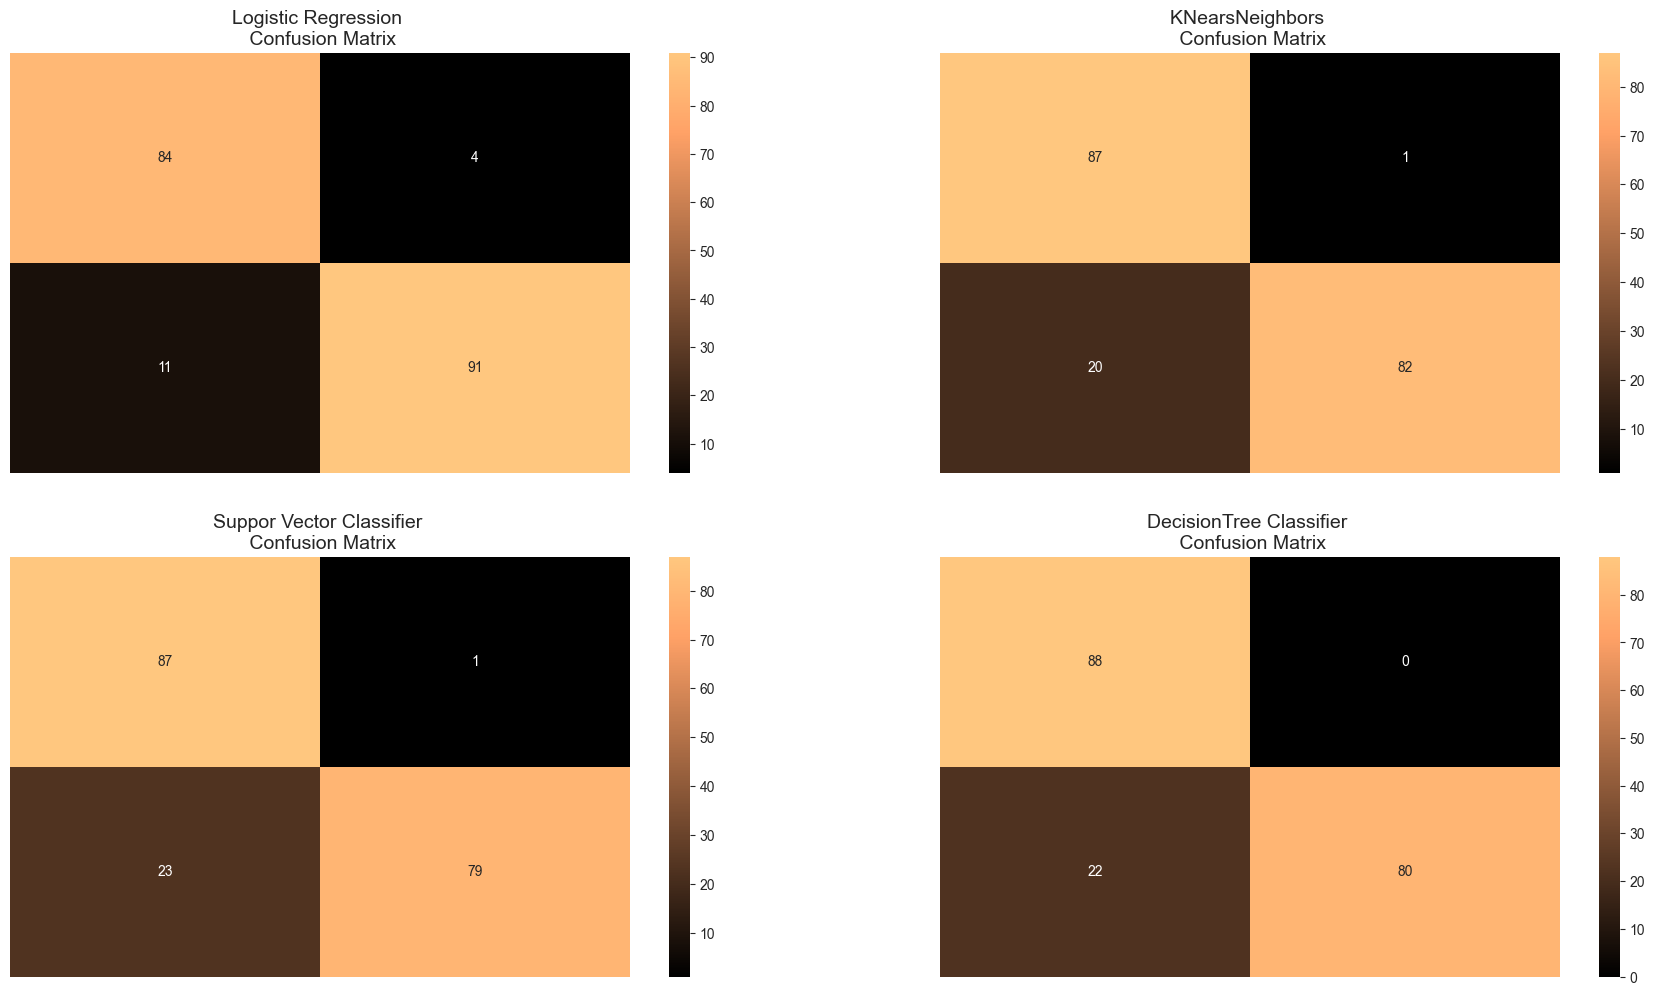

In [202]:
from sklearn.metrics import confusion_matrix

# Logistic Regression fitted using SMOTE technique
y_pred_log_reg = log_reg_sm.predict(X_test)

# Other models fitted with UnderSampling
y_pred_knear = knears_neighbors.predict(X_test)
y_pred_svc = svc.predict(X_test)
y_pred_tree = tree_clf.predict(X_test)


log_reg_cf = confusion_matrix(y_test, y_pred_log_reg)
kneighbors_cf = confusion_matrix(y_test, y_pred_knear)
svc_cf = confusion_matrix(y_test, y_pred_svc)
tree_cf = confusion_matrix(y_test, y_pred_tree)

fig, ax = plt.subplots(2, 2,figsize=(22,12))


sns.heatmap(log_reg_cf, ax=ax[0][0], annot=True, cmap=plt.cm.copper)
ax[0, 0].set_title("Logistic Regression \n Confusion Matrix", fontsize=14)
ax[0, 0].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[0, 0].set_yticklabels(['', ''], fontsize=14, rotation=360)

sns.heatmap(kneighbors_cf, ax=ax[0][1], annot=True, cmap=plt.cm.copper)
ax[0][1].set_title("KNearsNeighbors \n Confusion Matrix", fontsize=14)
ax[0][1].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[0][1].set_yticklabels(['', ''], fontsize=14, rotation=360)

sns.heatmap(svc_cf, ax=ax[1][0], annot=True, cmap=plt.cm.copper)
ax[1][0].set_title("Suppor Vector Classifier \n Confusion Matrix", fontsize=14)
ax[1][0].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[1][0].set_yticklabels(['', ''], fontsize=14, rotation=360)

sns.heatmap(tree_cf, ax=ax[1][1], annot=True, cmap=plt.cm.copper)
ax[1][1].set_title("DecisionTree Classifier \n Confusion Matrix", fontsize=14)
ax[1][1].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[1][1].set_yticklabels(['', ''], fontsize=14, rotation=360)


plt.show()

In [203]:
from sklearn.metrics import classification_report

print('Logistic Regression:')
print(classification_report(y_test, y_pred_log_reg))

print('KNears Neighbors:')
print(classification_report(y_test, y_pred_knear))

print('Support Vector Classifier:')
print(classification_report(y_test, y_pred_svc))

print('Support Vector Classifier:')
print(classification_report(y_test, y_pred_tree))

Logistic Regression:
              precision    recall  f1-score   support

           0       0.88      0.95      0.92        88
           1       0.96      0.89      0.92       102

    accuracy                           0.92       190
   macro avg       0.92      0.92      0.92       190
weighted avg       0.92      0.92      0.92       190

KNears Neighbors:
              precision    recall  f1-score   support

           0       0.81      0.99      0.89        88
           1       0.99      0.80      0.89       102

    accuracy                           0.89       190
   macro avg       0.90      0.90      0.89       190
weighted avg       0.91      0.89      0.89       190

Support Vector Classifier:
              precision    recall  f1-score   support

           0       0.79      0.99      0.88        88
           1       0.99      0.77      0.87       102

    accuracy                           0.87       190
   macro avg       0.89      0.88      0.87       190
weighted

In [204]:
# Final Score in the test set of logistic regression
from sklearn.metrics import accuracy_score

# Logistic Regression with Under-Sampling
y_pred = log_reg.predict(X_test)
undersample_score = accuracy_score(y_test, y_pred)



# Logistic Regression with SMOTE Technique (Better accuracy with SMOTE t)
y_pred_sm = best_est.predict(original_Xtest)
oversample_score = accuracy_score(original_ytest, y_pred_sm)


d = {'Technique': ['Random UnderSampling', 'Oversampling (SMOTE)'], 'Score': [undersample_score, oversample_score]}
final_df = pd.DataFrame(data=d)

# Move column
score = final_df['Score']
final_df.drop('Score', axis=1, inplace=True)
final_df.insert(1, 'Score', score)

# Note how high is accuracy score it can be misleading! 
final_df

Technique     Score
0  Random UnderSampling  0.921053
1  Oversampling (SMOTE)  0.990081

### Neural Networks Testing Random UnderSampling Data vs OverSampling (SMOTE):

#### Keras || Random UnderSampling

In [205]:
import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Activation
from keras.layers import Dense
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy

n_inputs = X_train.shape[1]

undersample_model = Sequential([
    Dense(n_inputs, input_shape=(n_inputs, ), activation='relu'),
    Dense(32, activation='relu'),
    Dense(2, activation='softmax')
])

In [206]:
undersample_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 31)                992       
                                                                 
 dense_7 (Dense)             (None, 32)                1024      
                                                                 
 dense_8 (Dense)             (None, 2)                 66        
                                                                 
Total params: 2082 (8.13 KB)
Trainable params: 2082 (8.13 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [207]:
undersample_model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [208]:
%%time
undersample_model.fit(X_train, y_train, validation_split=0.2, batch_size=25, epochs=20, shuffle=True, verbose=1)

Epoch 1/20
25/25 [==============================] - 1s 9ms/step - loss: 0.8953 - accuracy: 0.6628 - val_loss: 0.4901 - val_accuracy: 0.7500
Epoch 2/20
25/25 [==============================] - 0s 3ms/step - loss: 0.3734 - accuracy: 0.8843 - val_loss: 0.3589 - val_accuracy: 0.8553
Epoch 3/20
25/25 [==============================] - 0s 3ms/step - loss: 0.2847 - accuracy: 0.9157 - val_loss: 0.2840 - val_accuracy: 0.8816
Epoch 4/20
25/25 [==============================] - 0s 3ms/step - loss: 0.2305 - accuracy: 0.9289 - val_loss: 0.2439 - val_accuracy: 0.9079
Epoch 5/20
25/25 [==============================] - 0s 3ms/step - loss: 0.1908 - accuracy: 0.9388 - val_loss: 0.2223 - val_accuracy: 0.9145
Epoch 6/20
25/25 [==============================] - 0s 3ms/step - loss: 0.1631 - accuracy: 0.9455 - val_loss: 0.2086 - val_accuracy: 0.9145
Epoch 7/20
25/25 [==============================] - 0s 3ms/step - loss: 0.1431 - accuracy: 0.9488 - val_loss: 0.2031 - val_accuracy: 0.9145
Epoch 8/20
25/25 [==

In [209]:
undersample_predictions = undersample_model.predict(original_Xtest, batch_size=200, verbose=1)

285/285 [==============================] - 0s 1ms/step


In [210]:
undersample_fraud_predictions = (undersample_model.predict(original_Xtest, batch_size=200, verbose=1) > 0.5).astype("int32")

285/285 [==============================] - 0s 1ms/step


In [211]:
import itertools

# Create a confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=14)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

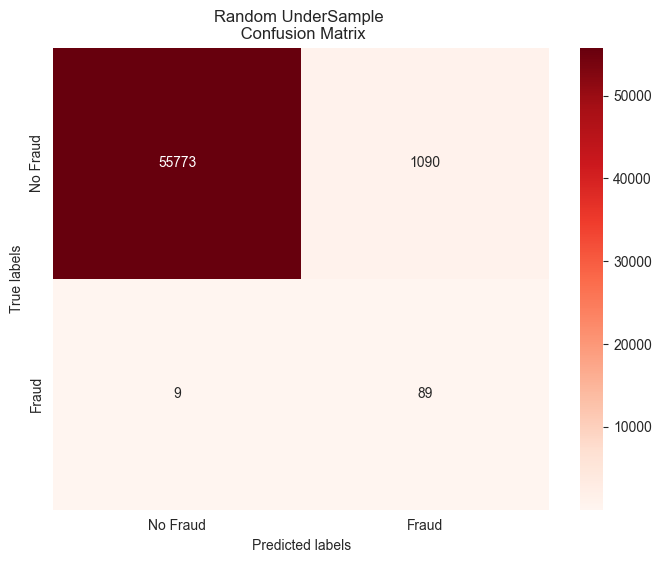

In [212]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# If predictions are probabilities, convert them to binary using a threshold of 0.5
if undersample_fraud_predictions.ndim > 1:
    undersample_fraud_predictions = undersample_fraud_predictions.argmax(axis=1)

# Compute confusion matrix
undersample_cm = confusion_matrix(original_ytest, undersample_fraud_predictions)

# Plotting the confusion matrix
labels = ['No Fraud', 'Fraud']
def plot_confusion_matrix(cm, labels, title='Confusion Matrix', cmap=plt.cm.Blues):
    sns.heatmap(cm, annot=True, fmt="d", cmap=cmap, xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title(title)

# Display the confusion matrix
fig = plt.figure(figsize=(8, 6))
plot_confusion_matrix(undersample_cm, labels, title="Random UnderSample \n Confusion Matrix", cmap=plt.cm.Reds)
plt.show()

#### Keras || OverSampling (SMOTE):

In [213]:
n_inputs = Xsm_train.shape[1]

oversample_model = Sequential([
    Dense(n_inputs, input_shape=(n_inputs, ), activation='relu'),
    Dense(32, activation='relu'),
    Dense(2, activation='softmax')
])

In [214]:
# Compile the model
oversample_model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [215]:
oversample_model.fit(Xsm_train, ysm_train, validation_split=0.2, batch_size=300, epochs=20, shuffle=True, verbose=1)

Epoch 1/20
1214/1214 [==============================] - 3s 2ms/step - loss: 0.0774 - accuracy: 0.9717 - val_loss: 0.0286 - val_accuracy: 0.9931
Epoch 2/20
1214/1214 [==============================] - 2s 2ms/step - loss: 0.0147 - accuracy: 0.9965 - val_loss: 0.0131 - val_accuracy: 0.9997
Epoch 3/20
1214/1214 [==============================] - 2s 2ms/step - loss: 0.0075 - accuracy: 0.9985 - val_loss: 0.0046 - val_accuracy: 1.0000
Epoch 4/20
1214/1214 [==============================] - 2s 2ms/step - loss: 0.0050 - accuracy: 0.9990 - val_loss: 0.0035 - val_accuracy: 1.0000
Epoch 5/20
1214/1214 [==============================] - 2s 2ms/step - loss: 0.0034 - accuracy: 0.9994 - val_loss: 0.0029 - val_accuracy: 1.0000
Epoch 6/20
1214/1214 [==============================] - 2s 2ms/step - loss: 0.0029 - accuracy: 0.9995 - val_loss: 0.0014 - val_accuracy: 1.0000
Epoch 7/20
1214/1214 [==============================] - 2s 2ms/step - loss: 0.0023 - accuracy: 0.9996 - val_loss: 0.0018 - val_accuracy:

In [216]:
oversample_predictions = oversample_model.predict(original_Xtest, batch_size=200, verbose=1)

285/285 [==============================] - 0s 1ms/step


In [217]:
# Generate predictions as probabilities
oversample_fraud_predictions = oversample_model.predict(original_Xtest, batch_size=200, verbose=1)

# Convert probabilities to binary class predictions (assuming binary classification with threshold 0.5)
oversample_fraud_predictions = (oversample_fraud_predictions > 0.5).astype(int)

285/285 [==============================] - 0s 980us/step


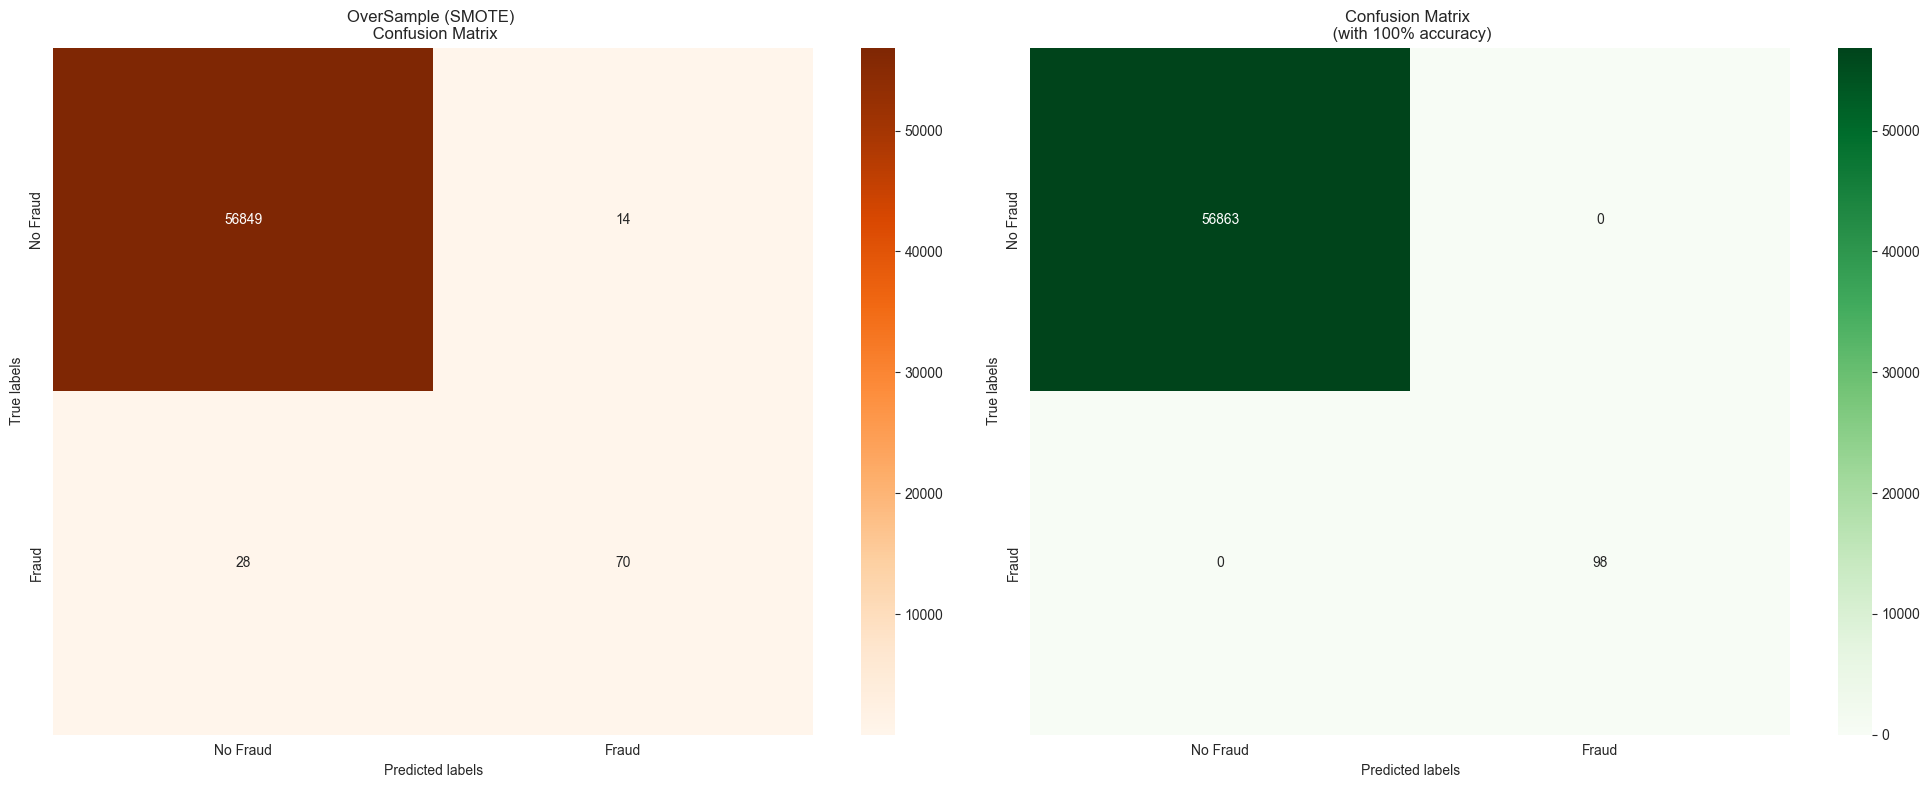

In [218]:
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Convert one-hot predictions to binary if needed
if oversample_fraud_predictions.ndim > 1 and oversample_fraud_predictions.shape[1] > 1:
    oversample_fraud_predictions = np.argmax(oversample_fraud_predictions, axis=1)

# Generate confusion matrices
oversample_smote = confusion_matrix(original_ytest, oversample_fraud_predictions)
actual_cm = confusion_matrix(original_ytest, original_ytest)
labels = ['No Fraud', 'Fraud']

# Plotting
fig = plt.figure(figsize=(20, 15))

# Plot first confusion matrix
plt.subplot(221)  # Equivalent to fig.add_subplot(221)
plot_confusion_matrix(oversample_smote, labels=labels, title="OverSample (SMOTE) \n Confusion Matrix", cmap=plt.cm.Oranges)

# Plot second confusion matrix
plt.subplot(222)  # Equivalent to fig.add_subplot(222)
plot_confusion_matrix(actual_cm, labels=labels, title="Confusion Matrix \n (with 100% accuracy)", cmap=plt.cm.Greens)

plt.tight_layout()
plt.show()

## Conclusion

Implementing SMOTE on our imbalanced dataset successfully addressed the disparity between no fraud and fraud transactions. However, it's important to note that the neural network sometimes predicts fewer correct fraud transactions with the oversampled data compared to the undersampled model. This discrepancy may be attributed to the fact that outlier removal was only applied to the undersampled dataset, which could impact performance. Moreover, the undersampled model struggles to accurately classify non-fraud transactions, leading to potential customer dissatisfaction if regular purchases are wrongly flagged as fraud. This situation could result in increased complaints for financial institutions. As a next step, I will perform outlier removal on the oversampled dataset to see if this improves accuracy. 

It's also worth mentioning that predictions and accuracies may fluctuate due to data shuffling in both datasets. Ultimately, our goal is to enhance the models' ability to accurately classify both no fraud and fraud transactions. Stay tuned for further updates!

**👨‍💻Author: Muhammad Hassaan**

[![GitHub](https://img.shields.io/badge/GitHub-Profile-blue?style=for-the-badge&logo=github)](https://github.com/iammuhammadhassaaan) 
[![Kaggle](https://img.shields.io/badge/Kaggle-Profile-blue?style=for-the-badge&logo=kaggle)](https://www.kaggle.com/mhassaan1122) 
[![LinkedIn](https://img.shields.io/badge/LinkedIn-Profile-blue?style=for-the-badge&logo=linkedin)](https://www.linkedin.com/in/iammuhammadhassaan7/)  
[![Email](https://img.shields.io/badge/Email-Contact%20Me-red?style=for-the-badge&logo=email)](mailto:muhammadhassaan7896@gmail.com)